In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Filter out warnings
import warnings
warnings.filterwarnings("ignore")

# Data Importing and Exploration


In [ ]:
# Import the data
df = pd.read_csv('Clusters.csv', index_col=0)
df = df.sample(frac=1).reset_index(drop=True)
df

,Player,Position,Team,Comp,Age-Dob_x,MP,Min,Goals,Ast,G+A,...,Errors,Dribbles Successful,Dribble Distance,Mistakes,Ball Recoveries,Air Duels Won%,Values,Age,Age-Dob_y,cluster
0,Aurelien Tchouameni,MF,real madrid,es La Liga,25-003,16,1364,0,0,0,...,0,5,6117,12,71,73.3,80000000.0,25,25-003,MF_Deep-Lying Playmaker
1,Goncalo Ramos,FW,paris s-g,fr Ligue 1,23-224,8,354,2,2,4,...,0,0,112,5,7,78.6,50000000.0,23,23-224,FW_Hard-Working Forward
2,Josue Casimir,FW,le havre,fr Ligue 1,23-128,13,783,1,1,2,...,1,7,683,22,31,27.8,3500000.0,23,23-128,FW_Hard-Working Forward
3,Koke,MF,atletico madrid,es La Liga,33-022,20,1248,1,1,2,...,1,8,3969,13,86,53.3,10000000.0,33,33-022,MF_Deep-Lying Playmaker
4,Alex Berenguer,FW,athletic club,es La Liga,29-210,20,1185,5,4,9,...,0,13,1199,27,45,37.8,12000000.0,29,29-210,FW_Inside Forward
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,Niklas Stark,DF,werder bremen,de Bundesliga,29-291,14,1072,0,1,1,...,1,1,3665,3,39,71.0,5000000.0,29,29-291,DF_Defensive Center-Back
1985,Dominik Javorcek,DF,holstein kiel,de Bundesliga,22-089,8,194,0,2,2,...,1,1,581,2,4,50.0,550000.0,22,22-089,DF_Potential Outlier/Incomplete Data (Backup D...
1986,Saba Goglichidze,DF,empoli,it Serie A,20-219,19,1491,0,0,0,...,1,2,2804,6,59,31.3,8000000.0,20,20-219,DF_Defensive Center-Back
1987,Keinan Davis,FW,udinese,it Serie A,26-352,14,688,2,1,3,...,0,11,338,24,27,53.8,14000000.0,26,26-352,FW_Hard-Working Forward


In [3024]:
df.columns

Index(['Player', 'Position', 'Team', 'Comp', 'Age-Dob_x', 'MP', 'Min', 'Goals',
       'Ast', 'G+A', 'xG', 'xA', 'SoT%', 'npxG/Sh', 'G-xG', 'Pass Cmp%',
       'Through Balls', 'Switch Passes', 'Crosses', 'Shot Creating Actions',
       'Def Action to Shot', 'Tackles', 'Shots Blocked', 'Interceptions',
       'Clearances', 'Errors', 'Dribbles Successful', 'Dribble Distance',
       'Mistakes', 'Ball Recoveries', 'Air Duels Won%', 'Values', 'Age',
       'Age-Dob_y', 'cluster'],
      dtype='object')

In [3025]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Player                 1989 non-null   object 
 1   Position               1989 non-null   object 
 2   Team                   1989 non-null   object 
 3   Comp                   1989 non-null   object 
 4   Age-Dob_x              1989 non-null   object 
 5   MP                     1989 non-null   int64  
 6   Min                    1989 non-null   int64  
 7   Goals                  1989 non-null   int64  
 8   Ast                    1989 non-null   int64  
 9   G+A                    1989 non-null   int64  
 10  xG                     1989 non-null   float64
 11  xA                     1989 non-null   float64
 12  SoT%                   1989 non-null   float64
 13  npxG/Sh                1989 non-null   float64
 14  G-xG                   1989 non-null   float64
 15  Pass

In [3026]:
# Look at the values of the column Comp
df['Comp'].value_counts()

Comp
es La Liga            436
it Serie A            428
eng Premier League    403
fr Ligue 1            362
de Bundesliga         360
Name: count, dtype: int64

In [3027]:
# Rename the league names with proper names
df['Comp'] = df['Comp'].replace({"eng Premier League": "Premier League"})
df['Comp'] = df['Comp'].replace({"it Serie A": "Serie A"})
df['Comp'] = df['Comp'].replace({"es La Liga": "La Liga"})
df['Comp'] = df['Comp'].replace({"fr Ligue 1": "Ligue 1"})
df['Comp'] = df['Comp'].replace({"de Bundesliga": "Bundesliga"})

# Check the values again
df['Comp'].value_counts()

Comp
La Liga           436
Serie A           428
Premier League    403
Ligue 1           362
Bundesliga        360
Name: count, dtype: int64

# Data Visualization


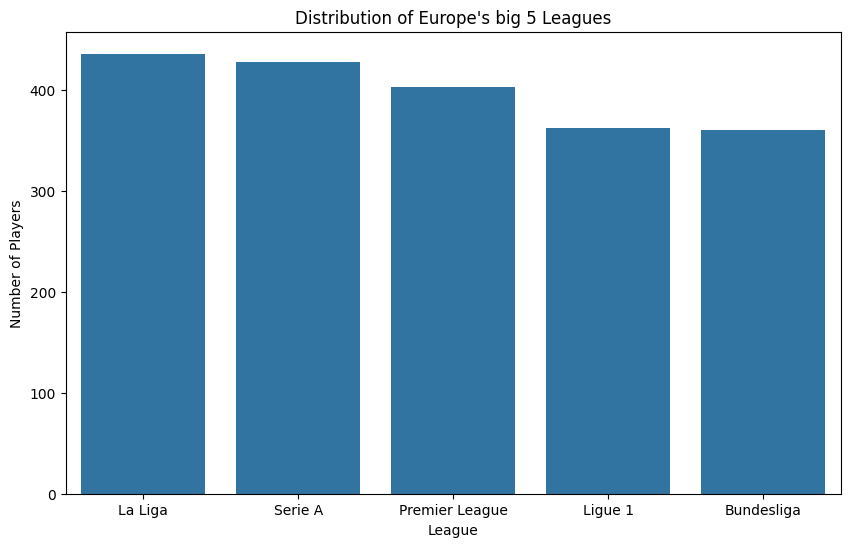

In [3028]:
# Visualizing the distribution of leagues
plt.figure(figsize=(10,6))
sns.barplot(x=df['Comp'].value_counts().index, y=df['Comp'].value_counts().values)
plt.xlabel('League')
plt.ylabel('Number of Players')
plt.title("Distribution of Europe's big 5 Leagues")
plt.show()

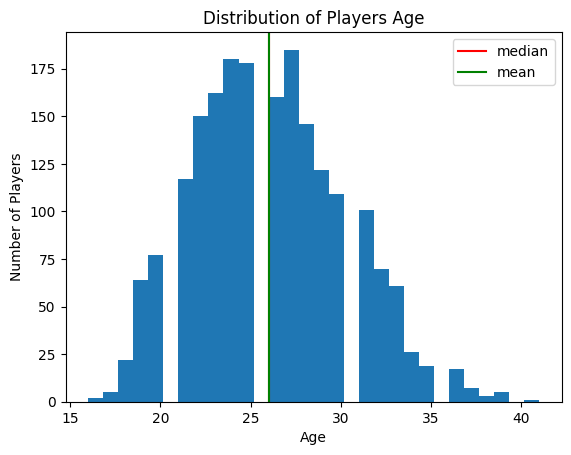

In [3029]:
# Plot a histogram to show the distribution of the players' age
plt.figure()
plt.hist(df['Age'], bins=30)
# add vertical line to show the median and mean age
plt.axvline(df['Age'].median(), color='r', label='median')
plt.axvline(df['Age'].mean(), color='g', label='mean')
plt.xlabel('Age')
plt.ylabel('Number of Players')
plt.title('Distribution of Players Age')
plt.legend()
plt.show()

In [3030]:
# Find the basic stastics of the players' value
df['Values'].describe()

count    1.989000e+03
mean     1.419932e+07
std      1.912377e+07
min      1.500000e+05
25%      3.000000e+06
50%      8.000000e+06
75%      1.700000e+07
max      2.000000e+08
Name: Values, dtype: float64

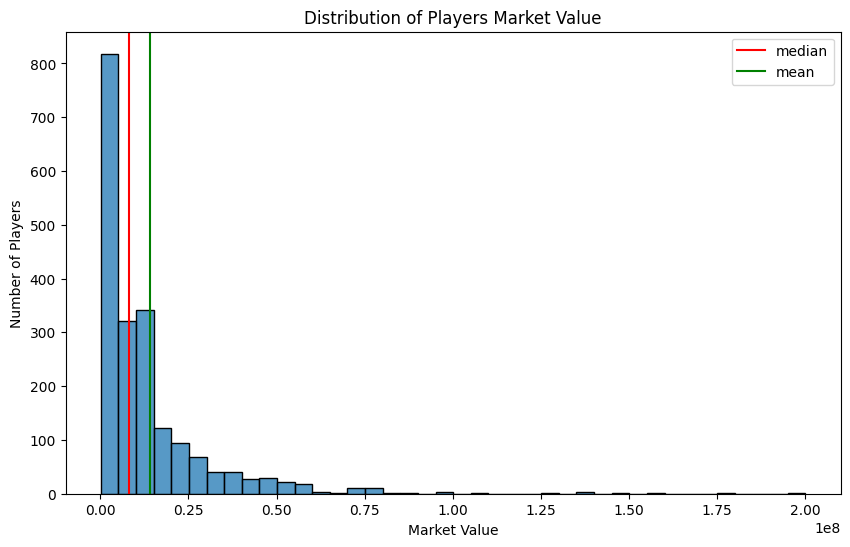

In [3031]:
# Visualizing the distribution of Player Market Value
plt.figure(figsize=(10,6))
sns.histplot(df['Values'], bins=40)

# add vertical line to show the median and mean value
plt.axvline(df['Values'].median(), color='r', label='median')
plt.axvline(df['Values'].mean(), color='g', label='mean')
plt.xlabel('Market Value')
plt.ylabel('Number of Players')
plt.title('Distribution of Players Market Value')
plt.legend()
plt.show()

In [3032]:
# The number of players in the dataframe
df['Player'].nunique()

1988

Find out the Top 10 players with the highest Market Value in Europe.

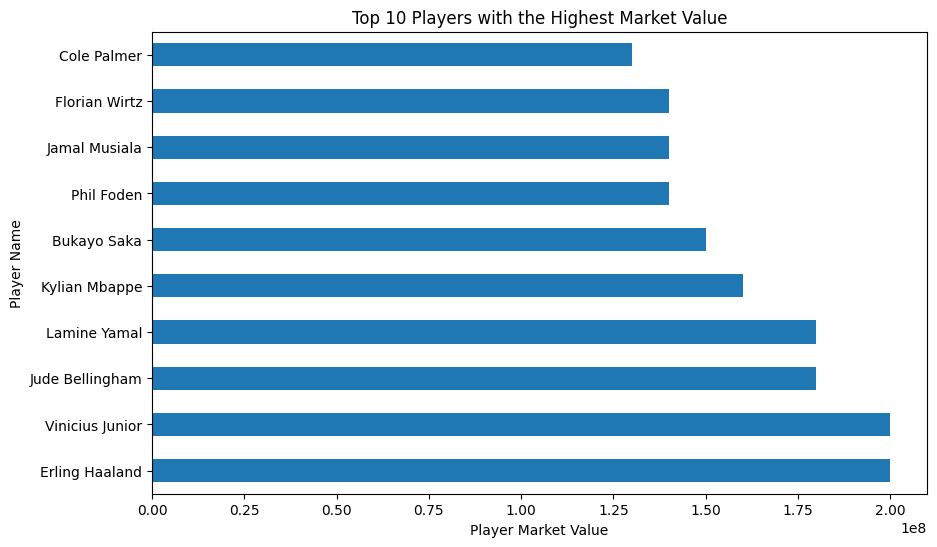

In [3033]:
# Visualizing the Top 10 players with the highest market value
plt.figure(figsize=(10,6))
df.groupby('Player')['Values'].mean().sort_values(ascending=False).head(10).plot(kind='barh')
plt.xlabel('Player Market Value')
plt.ylabel('Player Name')
plt.title('Top 10 Players with the Highest Market Value')   
plt.show()

I will now look at the bottom 10 players with the lowest Market Value

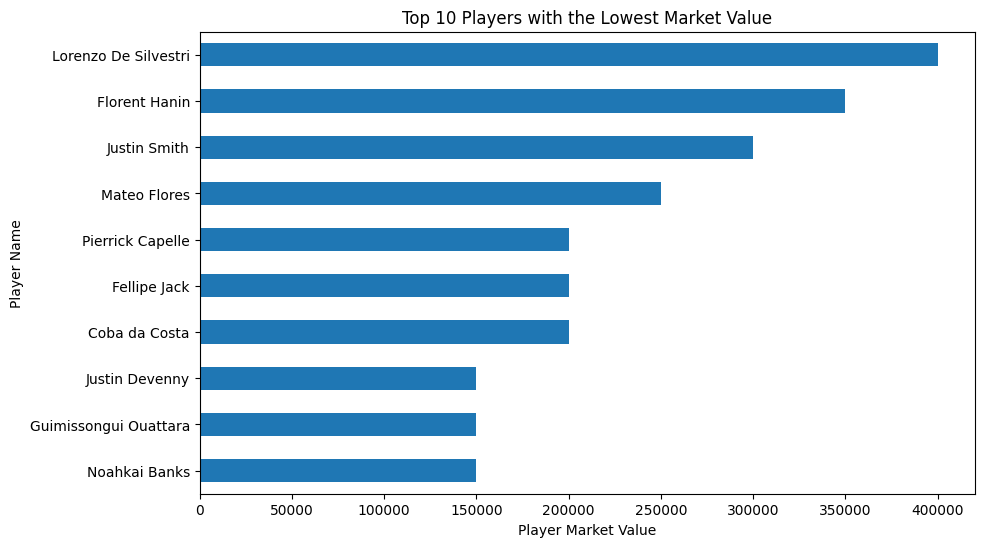

In [3034]:
# Visualizing the Top 10 players with the lowest market value
plt.figure(figsize=(10,6))
df.groupby('Player')['Values'].mean().sort_values(ascending=True).head(10).plot(kind='barh')
plt.xlabel('Player Market Value')
plt.ylabel('Player Name')
plt.title('Top 10 Players with the Lowest Market Value')
plt.show()

In [3035]:
# Look at the values of player positions
df['Position'].value_counts()

Position
DF    804
MF    680
FW    505
Name: count, dtype: int64

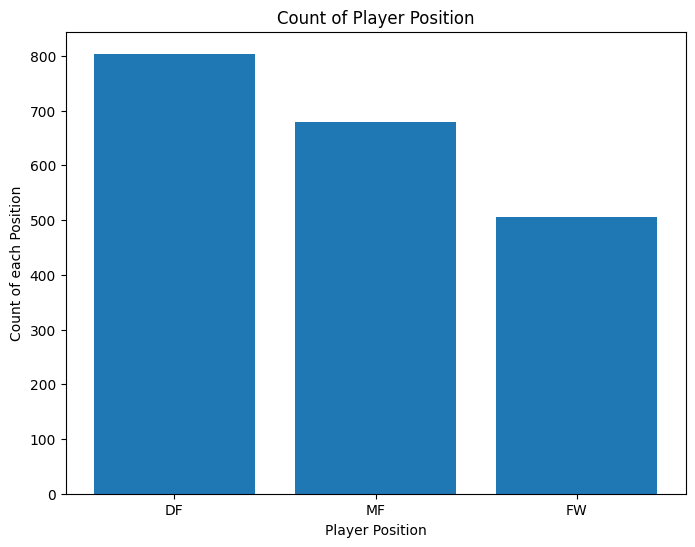

In [3036]:
# Visualizing the column Player position
plt.figure(figsize=(8,6))
plt.bar(df['Position'].value_counts().index, df['Position'].value_counts().values)
plt.title('Count of Player Position')
plt.ylabel('Count of each Position')
plt.xlabel('Player Position')
plt.show()

In [3037]:
# Look at the values of player detail positions
df['cluster'].value_counts(ascending=False)

cluster
DF_Potential Outlier/Incomplete Data (Backup Defender or Specialized Defender)    312
FW_Hard-Working Forward                                                           255
MF_Balanced Midfielder                                                            247
DF_Defensive Center-Back                                                          238
MF_Creative Midfielder                                                            169
DF_Attacking Full-Back                                                            142
MF_Defensive-minded Midfielder                                                    117
DF_Aerial Duel Specialist                                                         112
FW_Inside Forward                                                                 102
MF_Deep-Lying Playmaker                                                            96
FW_Target Man                                                                      90
FW_Dribbling Winger                           

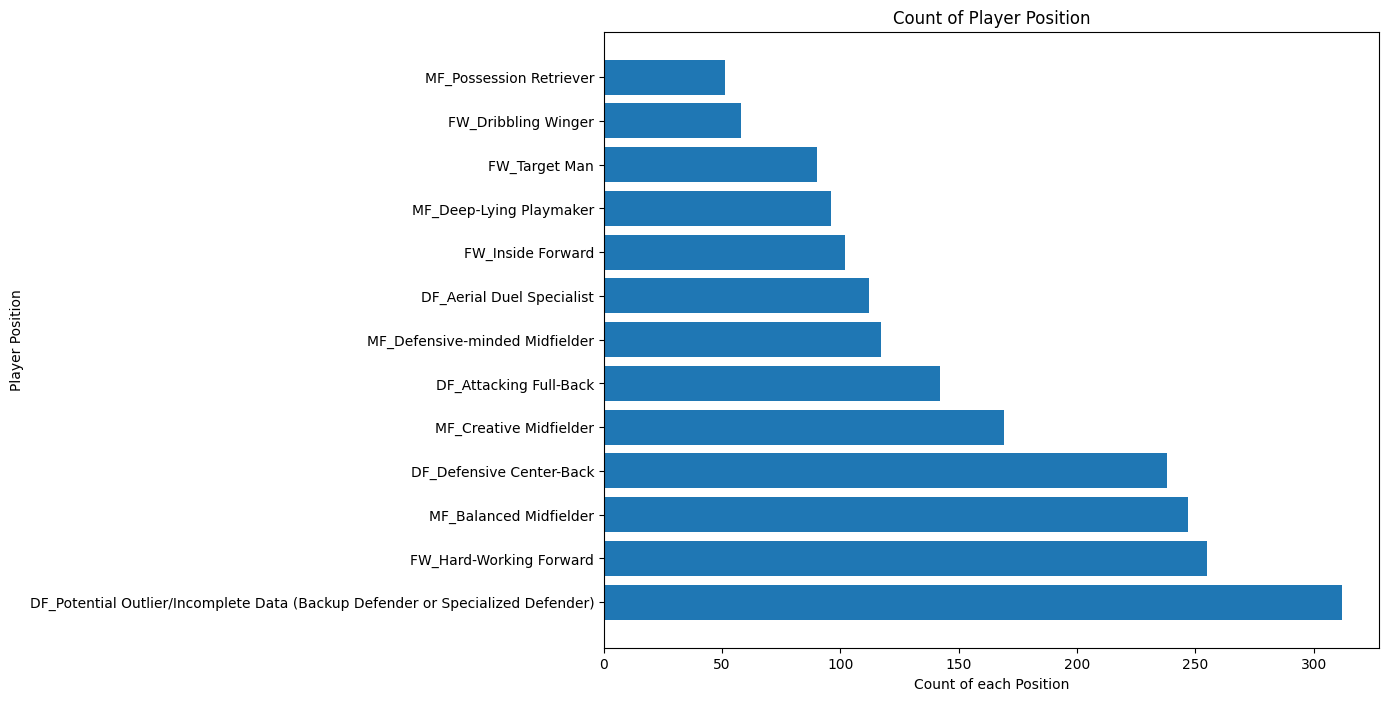

In [3038]:
# Visualizing the column Player detail position
plt.figure(figsize=(10,8))
plt.barh(df['cluster'].value_counts().index, df['cluster'].value_counts().values)
plt.title('Count of Player Position')
plt.xlabel('Count of each Position')
plt.ylabel('Player Position')
plt.show()

Let me now visualize the player Market Value with respect to their on-field position. 

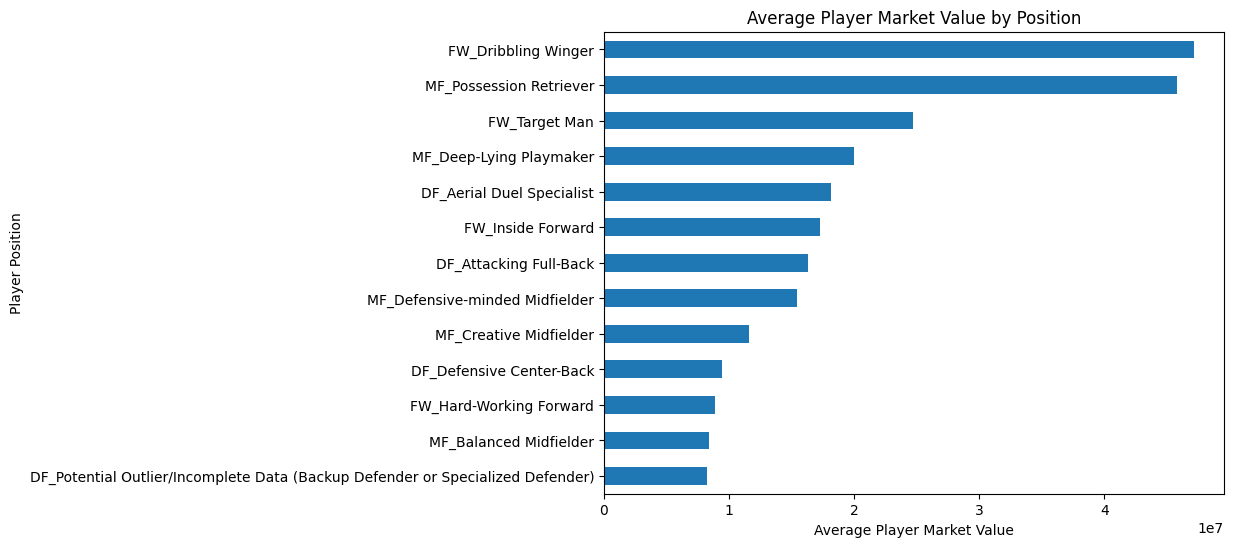

In [3039]:
# Visualizing the Average Player Market Value by their position
plt.figure(figsize=(8, 6))
df.groupby(['cluster'])['Values'].mean().sort_values(ascending=True).plot(kind='barh')   
plt.xlabel('Average Player Market Value')
plt.ylabel('Player Position')
plt.title('Average Player Market Value by Position')
plt.show()

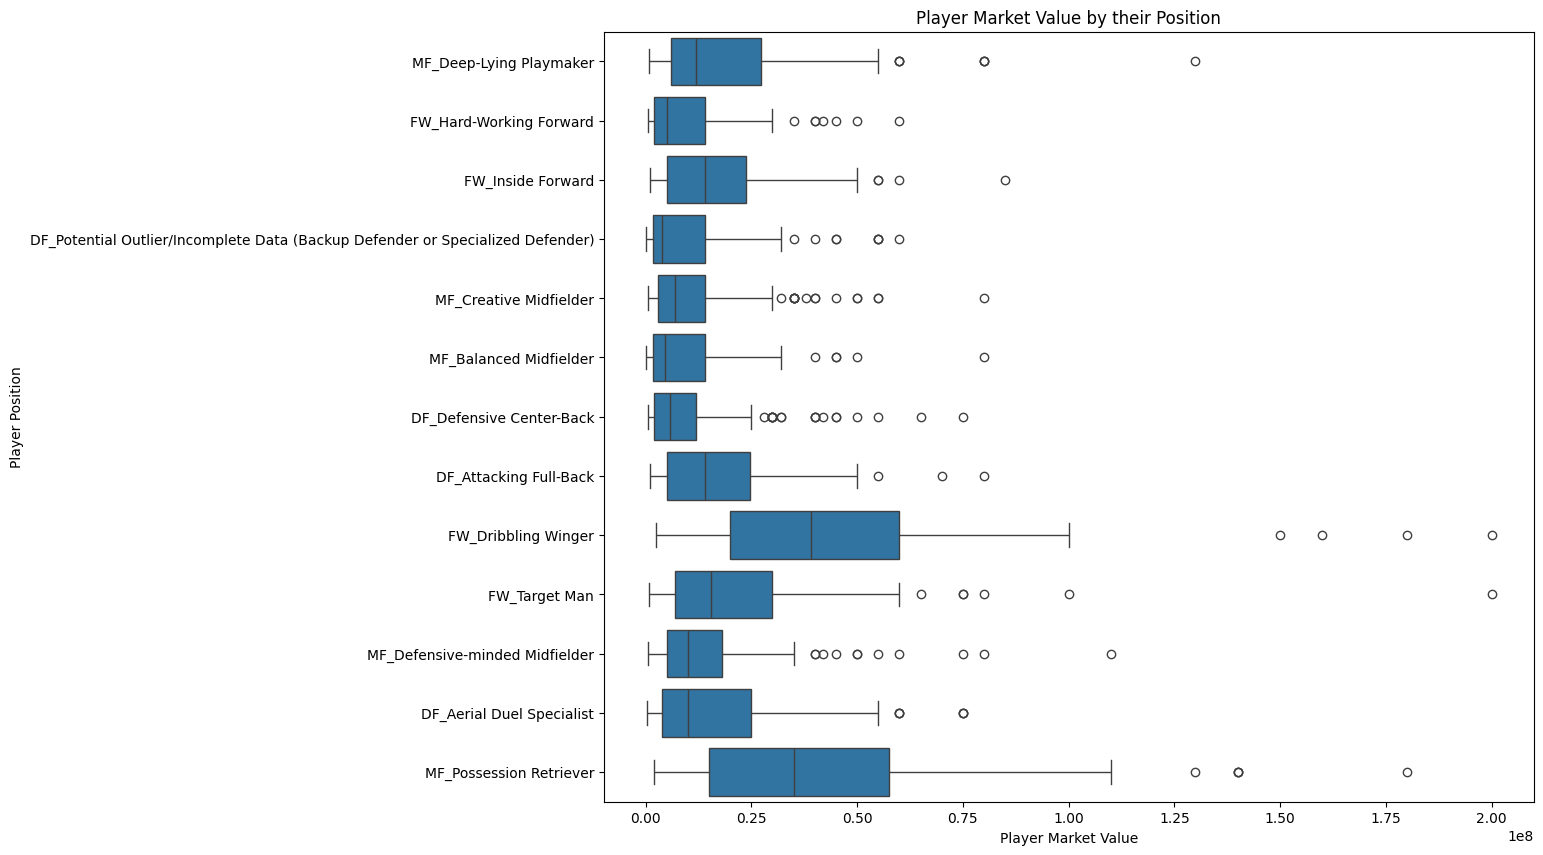

In [3040]:
# Visualize the relationship between Player Position and Market Value
# use a boxplot
plt.figure(figsize=(12, 10))
sns.boxplot(x="Values", y="cluster", data=df)
plt.xlabel('Player Market Value')
plt.ylabel('Player Position')
plt.title('Player Market Value by their Position')
plt.show()

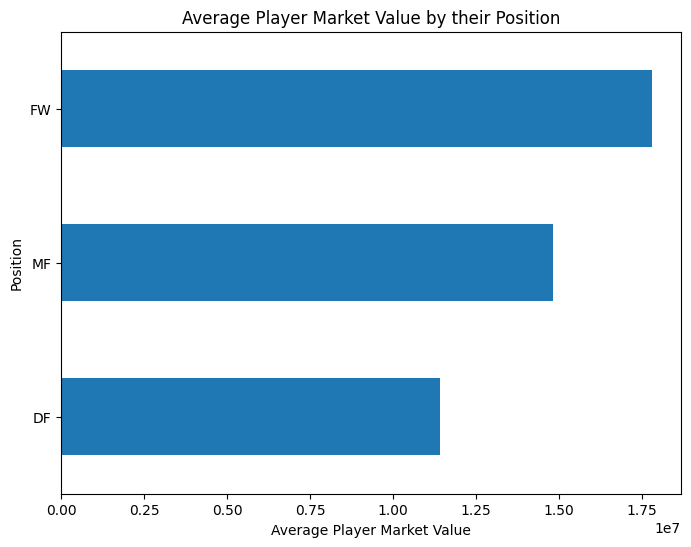

In [3041]:
# Visualizing the Average Player Market Value by their position 
plt.figure(figsize=(8, 6))
df.groupby(['Position'])['Values'].mean().sort_values(ascending=True).plot(kind='barh')   
plt.xlabel('Average Player Market Value')
plt.ylabel('Position')
plt.title('Average Player Market Value by their Position')
plt.show()


The horizontal barchart above shows that Attackers have the highest average Market Value among other positions which is around 17.5 million. This makes sense as these are the goal scoring players who can actually turn a game in favor of the team. This is followed by Midfielders and Defenders with around 15 million and 11.5 million respectively. I will now take a look at each Player positions with respect to their Market Values.

In [3042]:
# Create a new variable for the Player position Defender
defender_df = df[df['Position'] == 'DF']
defender_df.head()

,Player,Position,Team,Comp,Age-Dob_x,MP,Min,Goals,Ast,G+A,...,Errors,Dribbles Successful,Dribble Distance,Mistakes,Ball Recoveries,Air Duels Won%,Values,Age,Age-Dob_y,cluster
5,Luca Netz,DF,gladbach,Bundesliga,21-260,12,676,0,1,1,...,0,5,1387,10,31,50.0,8000000.0,21,21-260,DF_Potential Outlier/Incomplete Data (Backup D...
7,Pascal Stenzel,DF,stuttgart,Bundesliga,28-316,4,131,0,0,0,...,0,0,513,1,5,20.0,2500000.0,28,28-316,DF_Potential Outlier/Incomplete Data (Backup D...
10,Koni De Winter,DF,genoa,Serie A,22-232,12,999,2,0,2,...,2,1,2795,6,39,68.6,12000000.0,22,22-232,DF_Defensive Center-Back
11,Samuele Birindelli,DF,monza,Serie A,25-195,9,555,1,0,1,...,0,2,780,8,29,30.0,14000000.0,25,25-195,DF_Potential Outlier/Incomplete Data (Backup D...
12,Obite N'Dicka,DF,roma,Serie A,25-163,22,1980,0,1,1,...,1,0,8379,10,90,56.0,25000000.0,25,25-163,DF_Attacking Full-Back


In [3043]:
# Create a new variable for the Player position Midfielder
midfielder_df = df[df['Position'] == 'MF']
midfielder_df.head()

,Player,Position,Team,Comp,Age-Dob_x,MP,Min,Goals,Ast,G+A,...,Errors,Dribbles Successful,Dribble Distance,Mistakes,Ball Recoveries,Air Duels Won%,Values,Age,Age-Dob_y,cluster
0,Aurelien Tchouameni,MF,real madrid,La Liga,25-003,16,1364,0,0,0,...,0,5,6117,12,71,73.3,80000000.0,25,25-003,MF_Deep-Lying Playmaker
3,Koke,MF,atletico madrid,La Liga,33-022,20,1248,1,1,2,...,1,8,3969,13,86,53.3,10000000.0,33,33-022,MF_Deep-Lying Playmaker
6,Soungoutou Magassa,MF,monaco,Ligue 1,21-114,14,776,0,0,0,...,1,11,2169,11,63,36.7,12000000.0,21,21-114,MF_Creative Midfielder
8,Moritz-Broni Kwarteng,MF,bochum,Bundesliga,26-277,7,172,0,0,0,...,0,6,228,6,8,0.0,14000000.0,26,26-277,MF_Balanced Midfielder
9,Alex Scott,MF,bournemouth,Premier League,21-162,8,263,0,0,0,...,0,2,749,5,24,16.7,20000000.0,21,21-162,MF_Balanced Midfielder


In [3044]:
# Create a new variable for the Player position Attacker
attacker_df = df[df['Position'] == 'FW']
attacker_df.head()

,Player,Position,Team,Comp,Age-Dob_x,MP,Min,Goals,Ast,G+A,...,Errors,Dribbles Successful,Dribble Distance,Mistakes,Ball Recoveries,Air Duels Won%,Values,Age,Age-Dob_y,cluster
1,Goncalo Ramos,FW,paris s-g,Ligue 1,23-224,8,354,2,2,4,...,0,0,112,5,7,78.6,50000000.0,23,23-224,FW_Hard-Working Forward
2,Josue Casimir,FW,le havre,Ligue 1,23-128,13,783,1,1,2,...,1,7,683,22,31,27.8,3500000.0,23,23-128,FW_Hard-Working Forward
4,Alex Berenguer,FW,athletic club,La Liga,29-210,20,1185,5,4,9,...,0,13,1199,27,45,37.8,12000000.0,29,29-210,FW_Inside Forward
14,Williot Swedberg,FW,celta vigo,La Liga,20-364,19,780,2,3,5,...,1,4,446,29,31,40.0,14000000.0,20,20-364,FW_Hard-Working Forward
19,Valentin Mihaila,FW,parma,Serie A,24-363,20,1244,0,3,3,...,0,9,1376,26,37,33.3,3000000.0,24,24-363,FW_Inside Forward


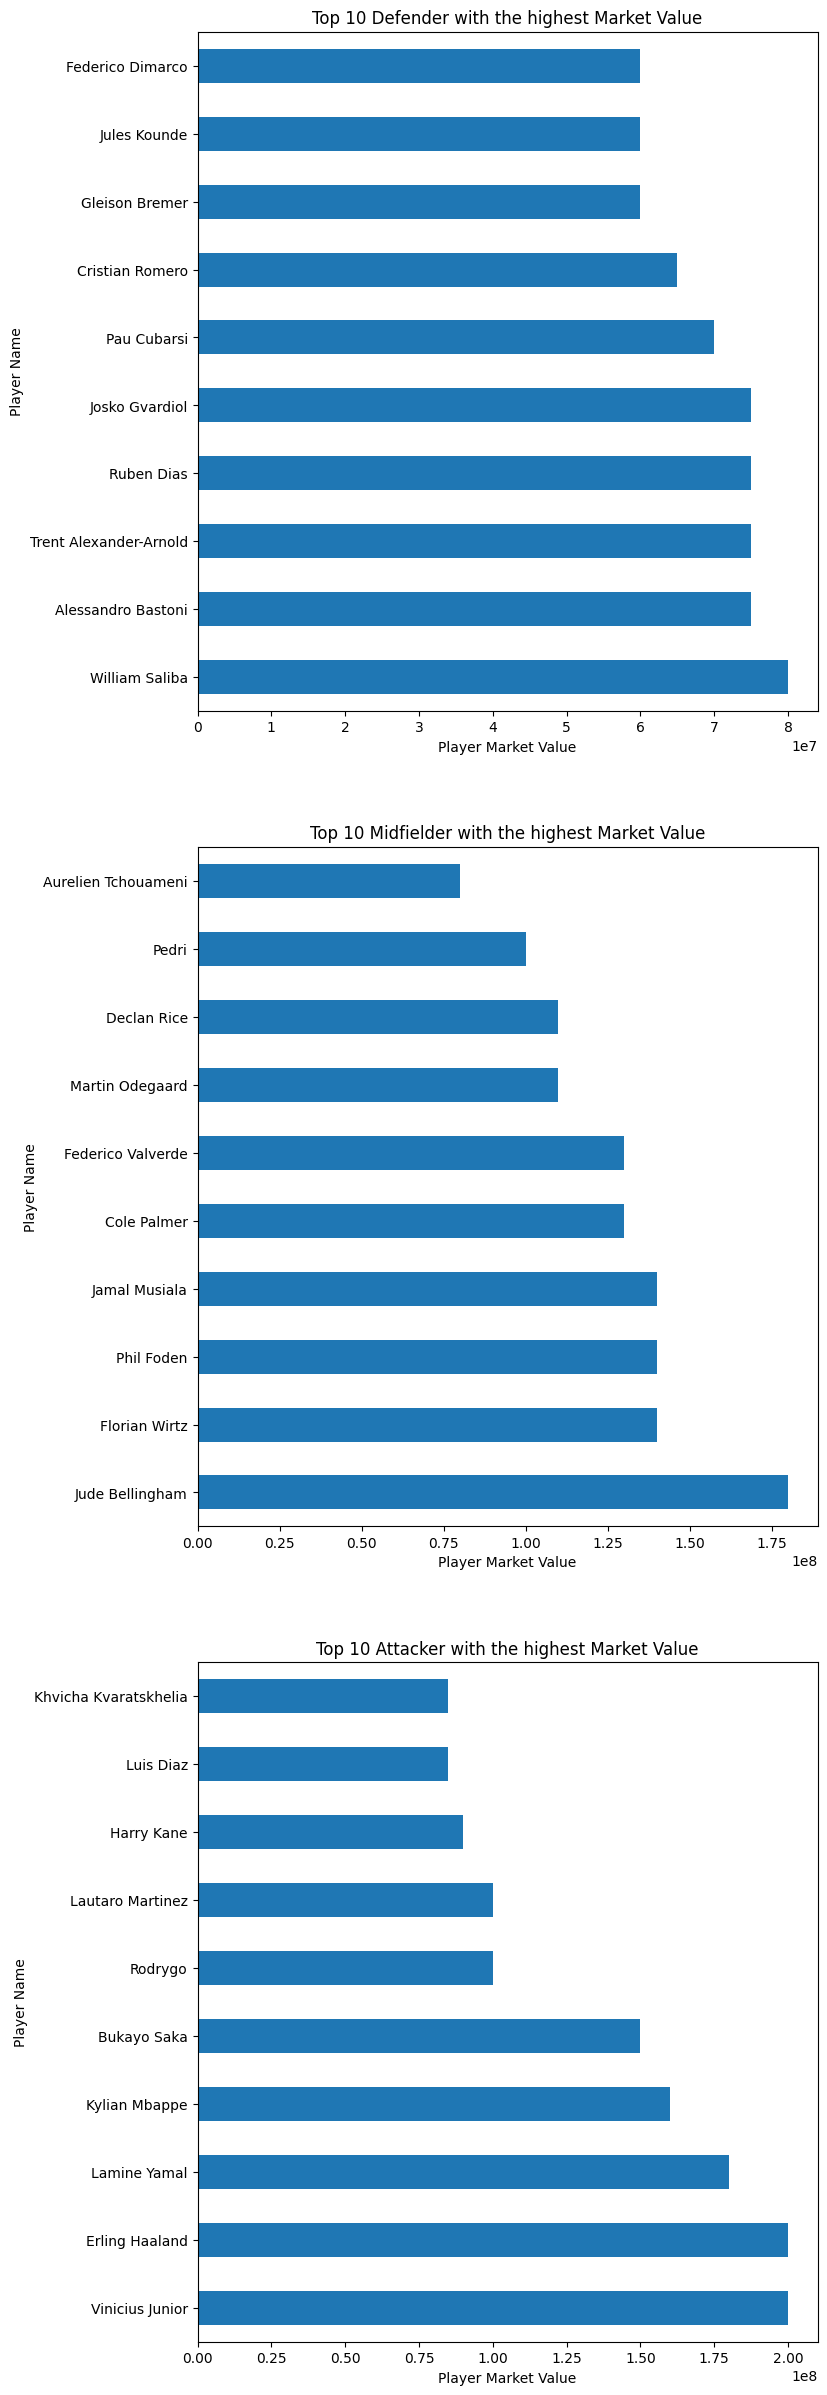

In [3045]:
# Visualizing Player positions with respect to their Market Values
plt.subplots(3, 1, figsize=(8, 30))

# Visualizing top 10 Defender with highest Market Values
plt.subplot(3, 1, 1)
defender_df.groupby(['Player'])['Values'].mean().sort_values(ascending=False).head(10).plot(kind='barh')   
plt.xlabel('Player Market Value')
plt.ylabel('Player Name')
plt.title('Top 10 Defender with the highest Market Value')

# Visualizing top 10 Midfielder with highest Market Values
plt.subplot(3, 1, 2)
midfielder_df.groupby(['Player'])['Values'].mean().sort_values(ascending=False).head(10).plot(kind='barh')   
plt.xlabel('Player Market Value')
plt.ylabel('Player Name')
plt.title('Top 10 Midfielder with the highest Market Value')

# Visualizing top 10 Attacker with highest Market Values
plt.subplot(3, 1, 3)
attacker_df.groupby(['Player'])['Values'].mean().sort_values(ascending=False).head(10).plot(kind='barh')   
plt.xlabel('Player Market Value')
plt.ylabel('Player Name')
plt.title('Top 10 Attacker with the highest Market Value')

plt.show()

In [3046]:
# Look at the values of the column Age
df['Age'].value_counts()

Age
27    185
24    180
25    178
23    162
26    160
22    150
28    146
29    122
21    117
30    109
31    101
20     77
32     70
19     64
33     61
34     26
18     22
35     19
36     17
37      7
17      5
39      5
38      3
16      2
41      1
Name: count, dtype: int64

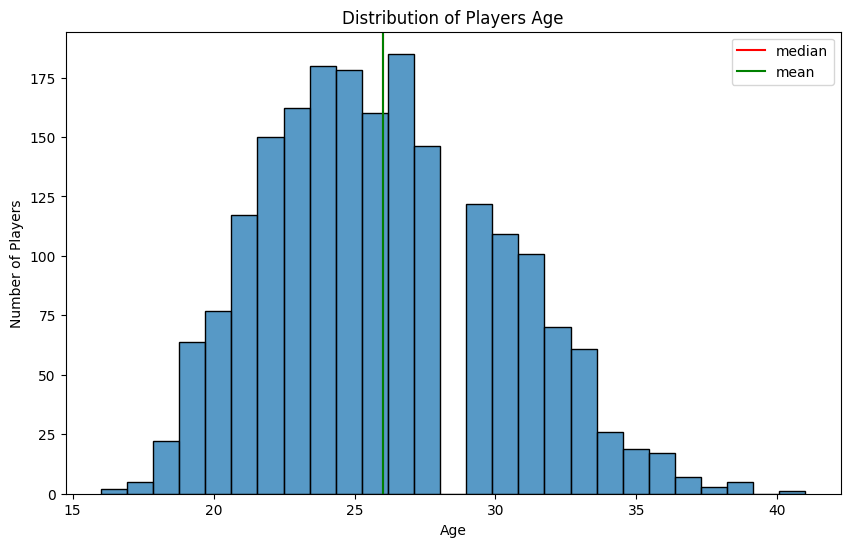

In [3047]:
# Visualizing the distribution of Player Age    
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Age')
# add vertical line to show the median and mean age
plt.axvline(df['Age'].median(), color='r', label='median')
plt.axvline(df['Age'].mean(), color='g', label='mean')
plt.xlabel('Age')
plt.ylabel('Number of Players')
plt.title('Distribution of Players Age')
plt.legend()
plt.show()

Looking at the distribution of the column, I can tell that there are more data of players aged 20 to 30 years. Most Footballers retire after the age of 35 and that is why we have less data for these ages. The average age of players is 25 years. 

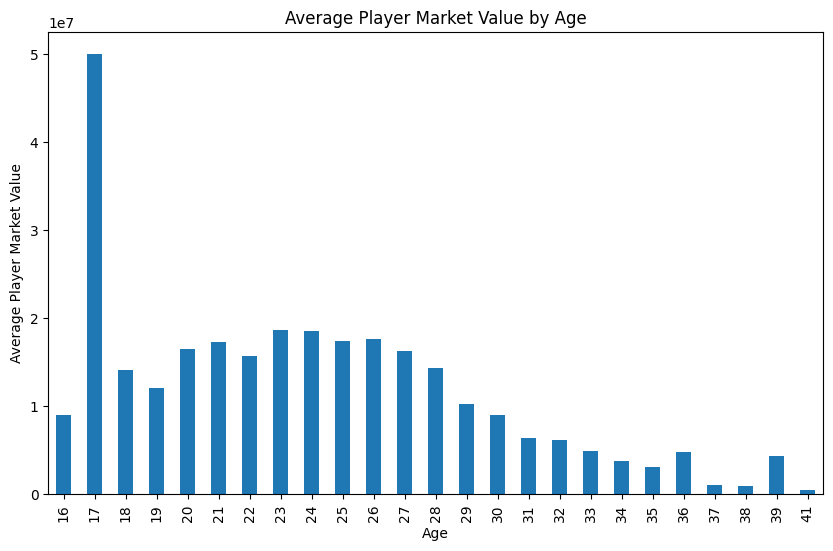

In [3048]:
# Visualizing the Average Player Market Value by their Age
plt.figure(figsize=(10, 6))
df.groupby(['Age'])['Values'].mean().plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Average Player Market Value')
plt.title('Average Player Market Value by Age')
plt.show()

The chart showing the average market value of football players by age. The highest market value is at age 17, after which it generally declines with increasing age.

In [3049]:
# Look at the values of the column league
df['Comp'].value_counts()

Comp
La Liga           436
Serie A           428
Premier League    403
Ligue 1           362
Bundesliga        360
Name: count, dtype: int64

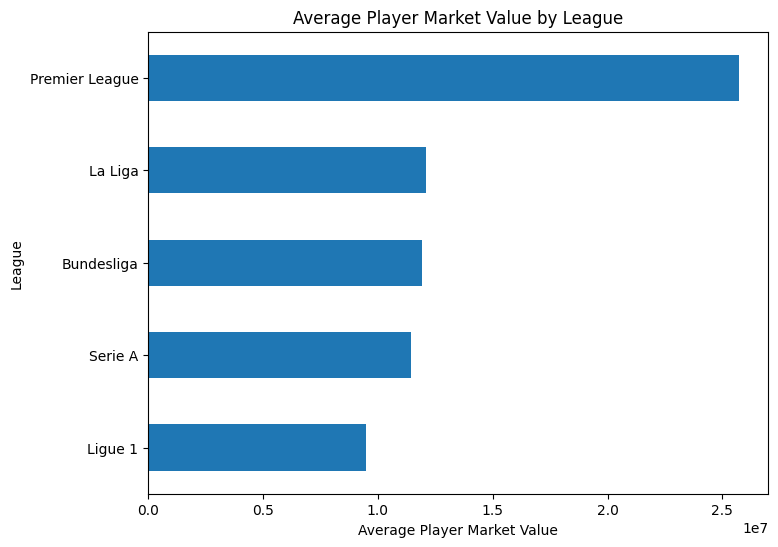

In [3050]:
# visualizing the Player Market Value by their League
plt.figure(figsize=(8, 6))
df.groupby(['Comp'])['Values'].mean().sort_values(ascending=True).plot(kind='barh')   
plt.xlabel('Average Player Market Value')
plt.ylabel('League')
plt.title('Average Player Market Value by League')
plt.show()

The players in the Premier League has the highest average market value of around 25 million EUR compared to other league players. The other league players have a similar average market value of around 12 million EUR.

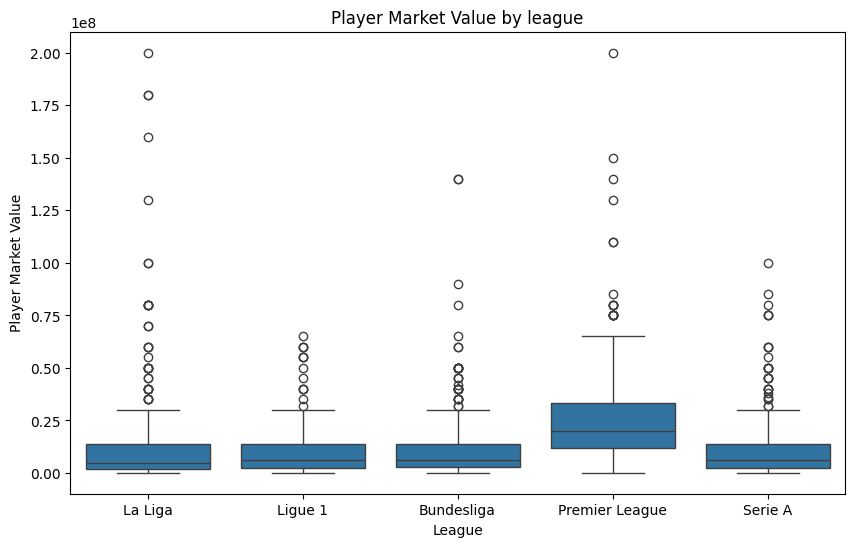

In [3051]:
# Visualize the relationship between the league and Market value
# use a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x="Comp", y="Values", data=df)
plt.xlabel('League')
plt.ylabel('Player Market Value')
plt.title('Player Market Value by league')
plt.show()

In [3052]:
# Find the number of total teams in the dataframe
df['Team'].nunique()

96

In [3053]:
# Calculate the total value of each team
team_val = df.groupby(['Team'])['Values'].sum().sort_values(ascending=False)
print(team_val)

Team
real madrid        1.177000e+09
manchester city    9.820000e+08
barcelona          9.785000e+08
arsenal            9.730000e+08
chelsea            8.760000e+08
                       ...     
leganes            6.910000e+07
empoli             6.540000e+07
st. pauli          4.560000e+07
holstein kiel      4.485000e+07
angers             4.375000e+07
Name: Values, Length: 96, dtype: float64


In [3054]:
team_val_df = pd.DataFrame({'Team': team_val.index, 'Total Value': team_val.values})
team_val_df.head(20)


,Team,Total Value
0,real madrid,1.177000e+09
1,manchester city,9.820000e+08
2,barcelona,9.785000e+08
3,arsenal,9.730000e+08
4,chelsea,8.760000e+08
5,bayern munich,8.140000e+08
6,liverpool,7.880000e+08
7,tottenham,7.400000e+08
8,paris s-g,7.325000e+08
9,manchester utd,7.175000e+08


Real Madrid spent the most amount of money in Europe to have the players in their team followed by Manchester City and Barcelona.

In [3055]:
# get basic statistics about the Total Value
team_val_df['Total Value'].describe()

count    9.600000e+01
mean     2.941922e+08
std      2.510431e+08
min      4.375000e+07
25%      1.138000e+08
50%      2.035000e+08
75%      3.932500e+08
max      1.177000e+09
Name: Total Value, dtype: float64

Now, I will divide the teams into four groups based on the total value of their players.

In [3056]:
# Separate the teams into 4 groups
value_team_1 = team_val_df[team_val_df['Total Value'] < 100000000]
value_team_2 = team_val_df[(team_val_df['Total Value'] >= 100000000) & (team_val_df['Total Value'] < 300000000)]
value_team_3 = team_val_df[(team_val_df['Total Value'] >= 300000000) & (team_val_df['Total Value'] < 600000000)]
value_team_4 = team_val_df[team_val_df['Total Value'] >= 600000000]

In [3057]:
value_team_4

,Team,Total Value
0,real madrid,1.177000e+09
1,manchester city,9.820000e+08
2,barcelona,9.785000e+08
3,arsenal,9.730000e+08
4,chelsea,8.760000e+08
5,bayern munich,8.140000e+08
6,liverpool,7.880000e+08
7,tottenham,7.400000e+08
8,paris s-g,7.325000e+08
9,manchester utd,7.175000e+08


In [3058]:
#Creating tier map
tier_map = {}
#tier 1
for club in value_team_1['Team']:
    tier_map[club] = 1
#tier 2
for club in value_team_2['Team']:
    tier_map[club] = 2
#tier 3
for club in value_team_3['Team']:
    tier_map[club] = 3
#tier 4
for club in value_team_4['Team']:
    tier_map[club] = 4

With feature engineering I will add the new feature, value_team into the dataframe.

In [3059]:
# Add the new column into the dataframe
df['Value Team'] = df['Team'].map(tier_map)
# Check the values of the column
df['Value Team'].value_counts()

Value Team
2    890
3    479
1    398
4    222
Name: count, dtype: int64

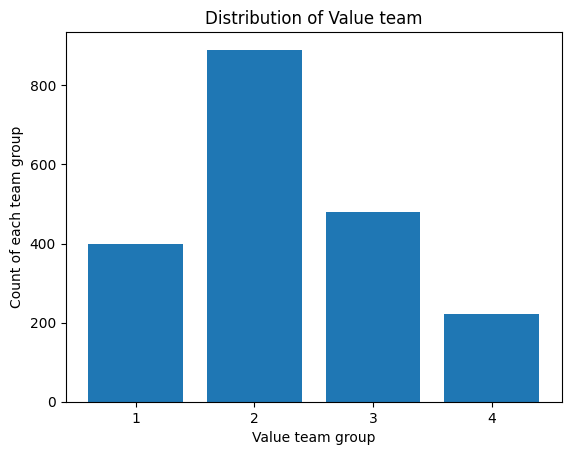

In [3060]:
# Visualizing the column value team
plt.figure()
plt.bar(df['Value Team'].value_counts().index, df['Value Team'].value_counts().values)
plt.title('Distribution of Value team')
plt.ylabel('Count of each team group')
plt.xlabel('Value team group')
plt.xticks(range(1, 5))
plt.show()

# Model Building and Evaluation


In [3061]:
# Create a copy of the dataset
data = df.copy()
data.head()

,Player,Position,Team,Comp,Age-Dob_x,MP,Min,Goals,Ast,G+A,...,Dribbles Successful,Dribble Distance,Mistakes,Ball Recoveries,Air Duels Won%,Values,Age,Age-Dob_y,cluster,Value Team
0,Aurelien Tchouameni,MF,real madrid,La Liga,25-003,16,1364,0,0,0,...,5,6117,12,71,73.3,80000000.0,25,25-003,MF_Deep-Lying Playmaker,4
1,Goncalo Ramos,FW,paris s-g,Ligue 1,23-224,8,354,2,2,4,...,0,112,5,7,78.6,50000000.0,23,23-224,FW_Hard-Working Forward,4
2,Josue Casimir,FW,le havre,Ligue 1,23-128,13,783,1,1,2,...,7,683,22,31,27.8,3500000.0,23,23-128,FW_Hard-Working Forward,2
3,Koke,MF,atletico madrid,La Liga,33-022,20,1248,1,1,2,...,8,3969,13,86,53.3,10000000.0,33,33-022,MF_Deep-Lying Playmaker,3
4,Alex Berenguer,FW,athletic club,La Liga,29-210,20,1185,5,4,9,...,13,1199,27,45,37.8,12000000.0,29,29-210,FW_Inside Forward,3


In [3063]:
data.columns

Index(['Player', 'Position', 'Team', 'Comp', 'Age-Dob_x', 'MP', 'Min', 'Goals',
       'Ast', 'G+A', 'xG', 'xA', 'SoT%', 'npxG/Sh', 'G-xG', 'Pass Cmp%',
       'Through Balls', 'Switch Passes', 'Crosses', 'Shot Creating Actions',
       'Def Action to Shot', 'Tackles', 'Shots Blocked', 'Interceptions',
       'Clearances', 'Errors', 'Dribbles Successful', 'Dribble Distance',
       'Mistakes', 'Ball Recoveries', 'Air Duels Won%', 'Values', 'Age',
       'Age-Dob_y', 'cluster', 'Value Team'],
      dtype='object')

In [3064]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Player                 1989 non-null   object 
 1   Position               1989 non-null   object 
 2   Team                   1989 non-null   object 
 3   Comp                   1989 non-null   object 
 4   Age-Dob_x              1989 non-null   object 
 5   MP                     1989 non-null   int64  
 6   Min                    1989 non-null   int64  
 7   Goals                  1989 non-null   int64  
 8   Ast                    1989 non-null   int64  
 9   G+A                    1989 non-null   int64  
 10  xG                     1989 non-null   float64
 11  xA                     1989 non-null   float64
 12  SoT%                   1989 non-null   float64
 13  npxG/Sh                1989 non-null   float64
 14  G-xG                   1989 non-null   float64
 15  Pass

Converting the Position column

In [3065]:
# Create dummy variables for the column Position
dummy_pos_grp = pd.get_dummies(data['Position'])

# Concatenate the dummy variables into the dataframe
data = pd.concat([data, dummy_pos_grp], axis=1)

# Remove the old Position column 
data.drop('Position', axis=1, inplace=True)

In [3066]:
data.shape

(1989, 38)

I will now remove the unnecessary columns from the dataframe as they don't add much value here. The Player and the league columns will also be removed as they are not necessary for the modeling.

In [3067]:
# Drop the columns that are not needed
data.drop(['Player', 'Team', 'Comp','Age-Dob_x','Age-Dob_y','cluster'], axis=1, inplace=True)
data.head()

,MP,Min,Goals,Ast,G+A,xG,xA,SoT%,npxG/Sh,G-xG,...,Dribble Distance,Mistakes,Ball Recoveries,Air Duels Won%,Values,Age,Value Team,DF,FW,MF
0,16,1364,0,0,0,1.0,0.5,9.1,0.09,-1.0,...,6117,12,71,73.3,80000000.0,25,4,False,False,True
1,8,354,2,2,4,3.2,0.9,66.7,0.18,-1.2,...,112,5,7,78.6,50000000.0,23,4,False,True,False
2,13,783,1,1,2,1.2,0.3,33.3,0.14,-0.2,...,683,22,31,27.8,3500000.0,23,2,False,True,False
3,20,1248,1,1,2,1.0,1.3,42.9,0.14,0.0,...,3969,13,86,53.3,10000000.0,33,3,False,False,True
4,20,1185,5,4,9,5.4,2.5,37.5,0.14,-0.4,...,1199,27,45,37.8,12000000.0,29,3,False,True,False


All the categorical columns have been converted to numerical values and the dataset is ready for modeling. I will take a look at all the columns.

In [3068]:
data.columns

Index(['MP', 'Min', 'Goals', 'Ast', 'G+A', 'xG', 'xA', 'SoT%', 'npxG/Sh',
       'G-xG', 'Pass Cmp%', 'Through Balls', 'Switch Passes', 'Crosses',
       'Shot Creating Actions', 'Def Action to Shot', 'Tackles',
       'Shots Blocked', 'Interceptions', 'Clearances', 'Errors',
       'Dribbles Successful', 'Dribble Distance', 'Mistakes',
       'Ball Recoveries', 'Air Duels Won%', 'Values', 'Age', 'Value Team',
       'DF', 'FW', 'MF'],
      dtype='object')

In [3069]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MP                     1989 non-null   int64  
 1   Min                    1989 non-null   int64  
 2   Goals                  1989 non-null   int64  
 3   Ast                    1989 non-null   int64  
 4   G+A                    1989 non-null   int64  
 5   xG                     1989 non-null   float64
 6   xA                     1989 non-null   float64
 7   SoT%                   1989 non-null   float64
 8   npxG/Sh                1989 non-null   float64
 9   G-xG                   1989 non-null   float64
 10  Pass Cmp%              1989 non-null   float64
 11  Through Balls          1989 non-null   int64  
 12  Switch Passes          1989 non-null   int64  
 13  Crosses                1989 non-null   int64  
 14  Shot Creating Actions  1989 non-null   int64  
 15  Def 

In [3070]:
# Take a look at the shape of the dataframe
print(f'There are {data.shape[0]} rows and {data.shape[1]} columns in the final dataframe')

There are 1989 rows and 32 columns in the final dataframe


In [ ]:
corr_X = data.corr()
corr_X

,MP,Min,Goals,Ast,G+A,xG,xA,SoT%,npxG/Sh,G-xG,...,Dribble Distance,Mistakes,Ball Recoveries,Air Duels Won%,Values,Age,Value Team,DF,FW,MF
MP,1.000000,0.857184,0.392349,0.421799,0.465485,0.425301,0.507785,0.020606,0.132732,0.062460,...,0.477245,0.614897,0.722274,-0.014336,0.260350,0.081510,0.094092,-0.139577,0.106914,0.046302
Min,0.857184,1.000000,0.363704,0.407152,0.438562,0.376722,0.509085,-0.008215,0.049294,0.091427,...,0.696378,0.558429,0.850237,0.101542,0.298784,0.101196,0.080385,0.093503,-0.077308,-0.025801
Goals,0.392349,0.363704,1.000000,0.472024,0.922705,0.894896,0.454593,0.273425,0.333588,0.520886,...,-0.086669,0.638056,0.139128,-0.119552,0.436740,0.002501,0.174750,-0.324468,0.437224,-0.065496
Ast,0.421799,0.407152,0.472024,1.000000,0.775397,0.484608,0.724114,0.083022,0.103031,0.126904,...,0.115879,0.515367,0.339624,-0.136555,0.422912,0.015882,0.220641,-0.219516,0.211996,0.032585
G+A,0.465485,0.438562,0.922705,0.775397,1.000000,0.852922,0.642269,0.232157,0.284002,0.428601,...,-0.011408,0.682400,0.248171,-0.145349,0.497769,0.008736,0.221656,-0.328406,0.405885,-0.032665
xG,0.425301,0.376722,0.894896,0.484608,0.852922,1.000000,0.443977,0.209819,0.411347,0.085185,...,-0.112232,0.678145,0.130045,-0.117669,0.430697,0.023841,0.176403,-0.368904,0.496064,-0.073513
xA,0.507785,0.509085,0.454593,0.724114,0.642269,0.443977,1.000000,0.088390,0.036095,0.165706,...,0.239459,0.558722,0.490167,-0.153585,0.433694,0.044715,0.216728,-0.213429,0.141034,0.091401
SoT%,0.020606,-0.008215,0.273425,0.083022,0.232157,0.209819,0.088390,1.000000,0.276936,0.209119,...,-0.100983,0.124346,-0.053788,-0.075561,0.090049,-0.052227,0.051937,-0.096587,0.184565,-0.069425
npxG/Sh,0.132732,0.049294,0.333588,0.103031,0.284002,0.411347,0.036095,0.276936,1.000000,-0.042039,...,-0.101066,0.177305,-0.055703,-0.024889,0.119137,0.044578,0.101638,-0.167729,0.307579,-0.108696
G-xG,0.062460,0.091427,0.520886,0.126904,0.428601,0.085185,0.165706,0.209119,-0.042039,1.000000,...,0.021176,0.127397,0.061874,-0.041840,0.151246,-0.040020,0.052731,-0.018784,0.027296,-0.005613


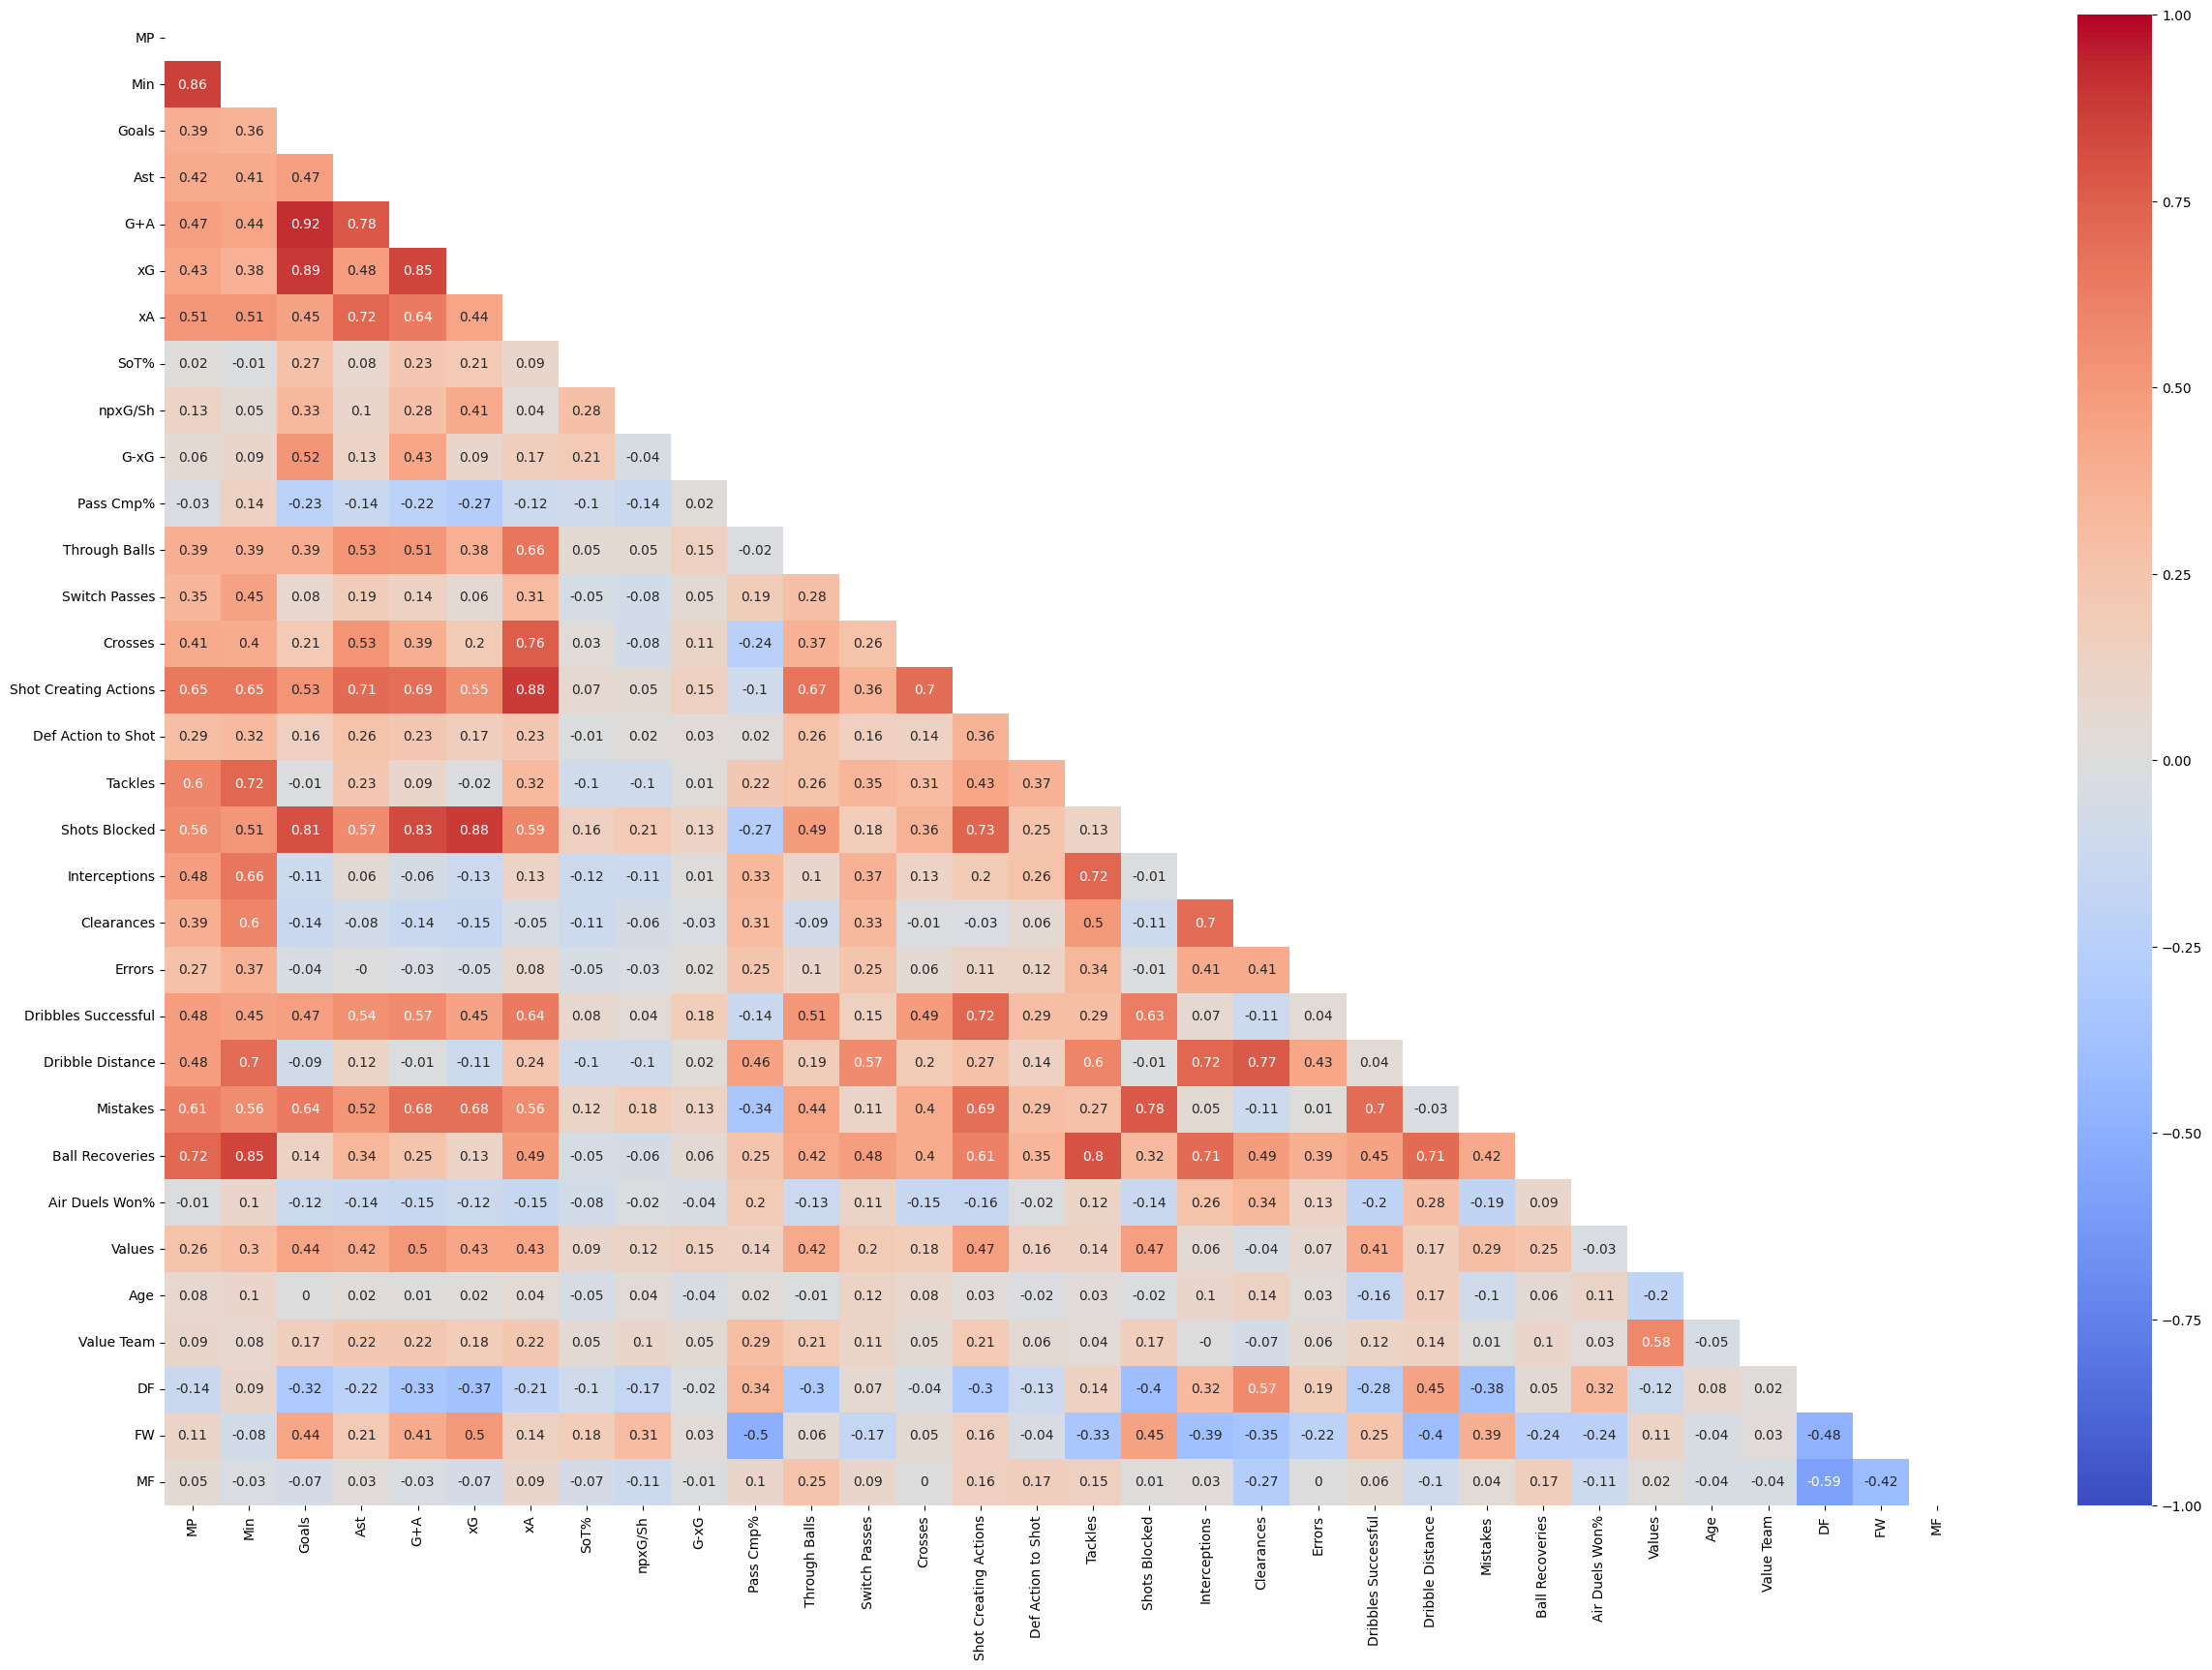

In [3072]:
# Creating the heatmap
mask = np.triu(corr_X)

plt.figure(figsize=(30, 20))
sns.heatmap(corr_X.round(2), annot=True, vmax=1, vmin=-1, center=0, cmap='coolwarm', mask=mask)
plt.show()

In [3073]:
# Setting up features (X) and target (y) for modeling.
X = data.drop(columns=["Values"])
y = data["Values"]

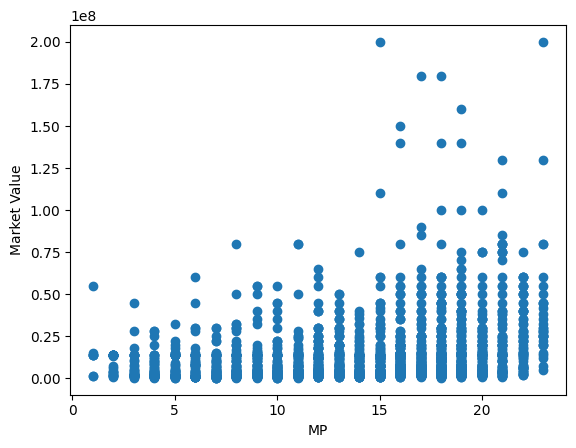

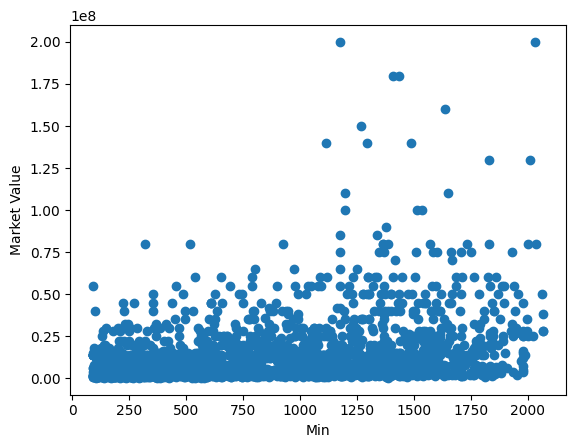

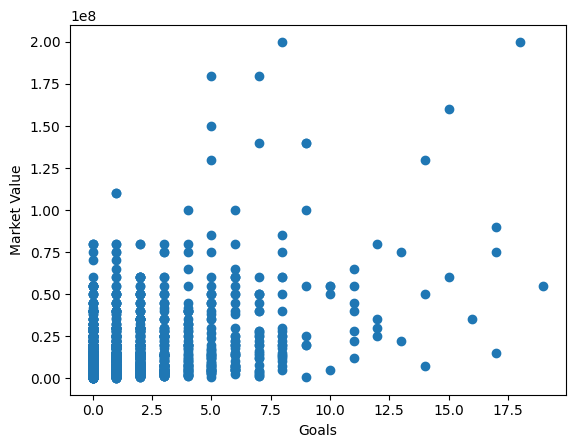

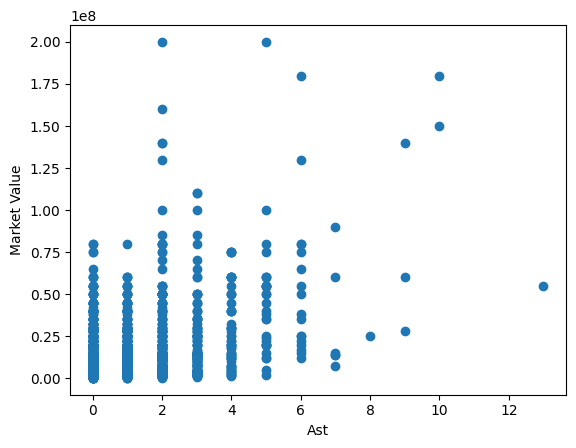

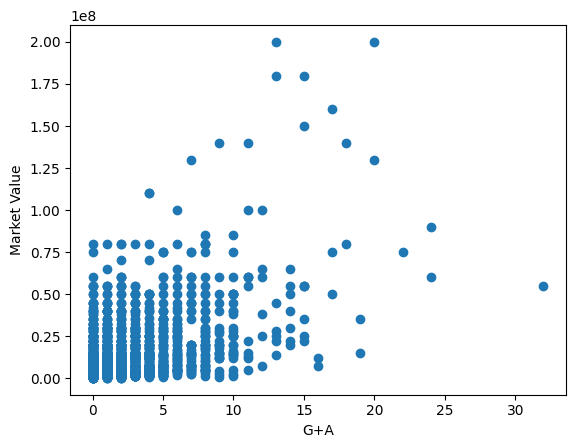

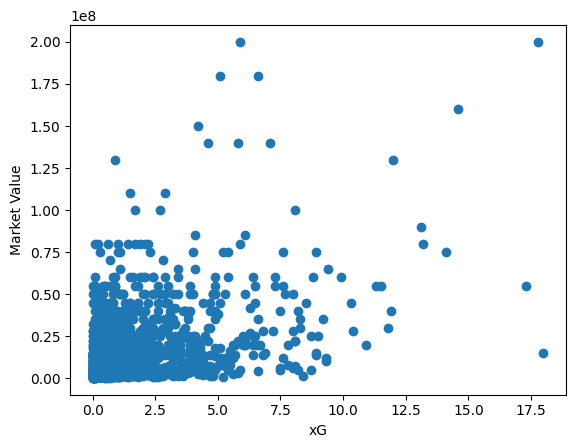

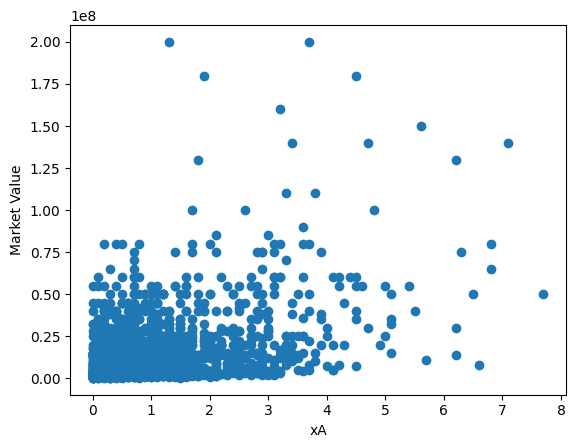

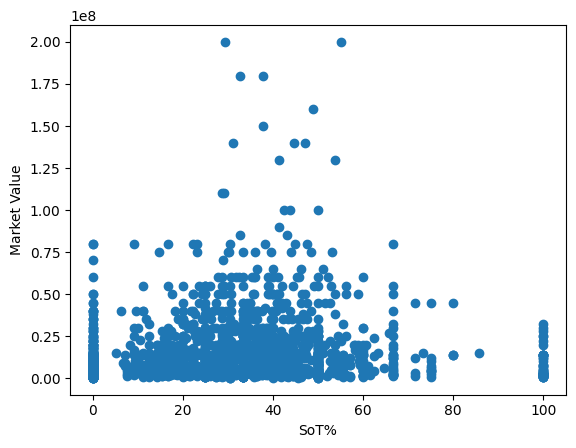

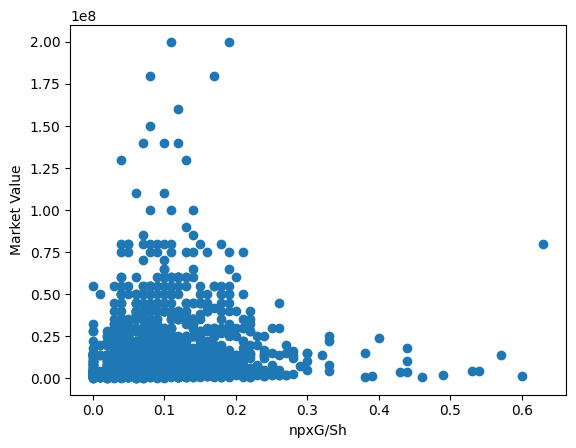

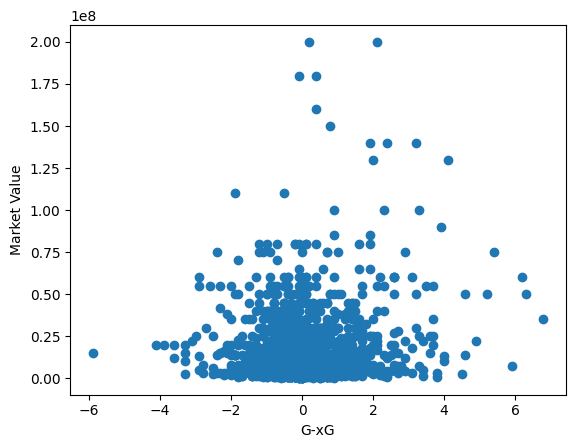

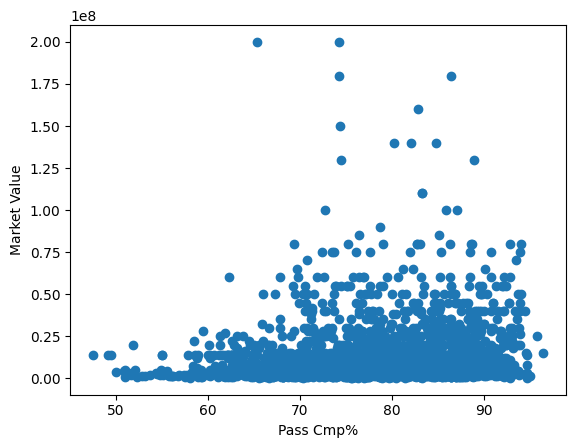

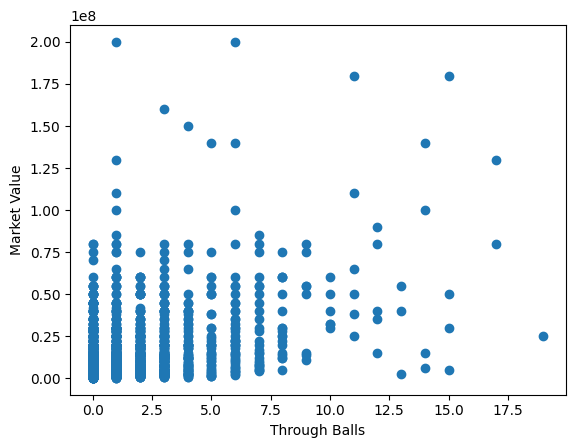

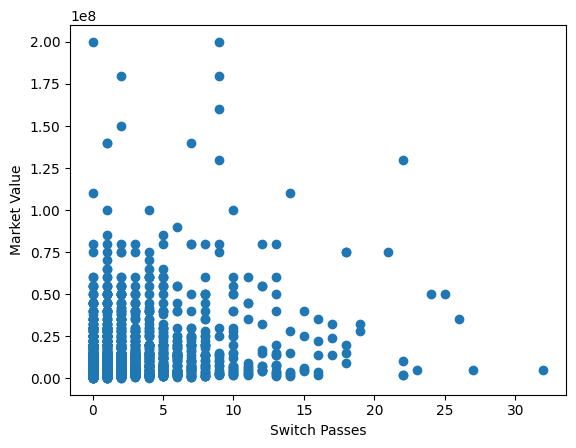

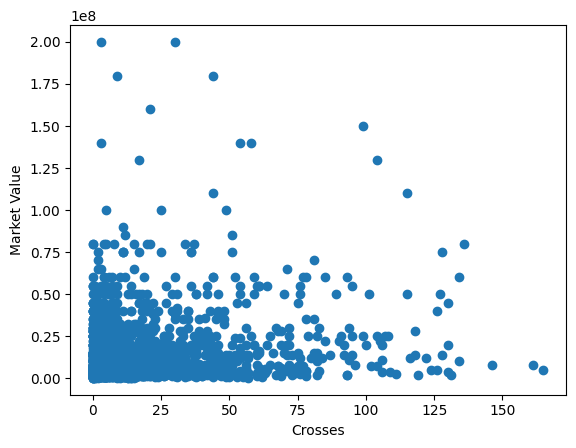

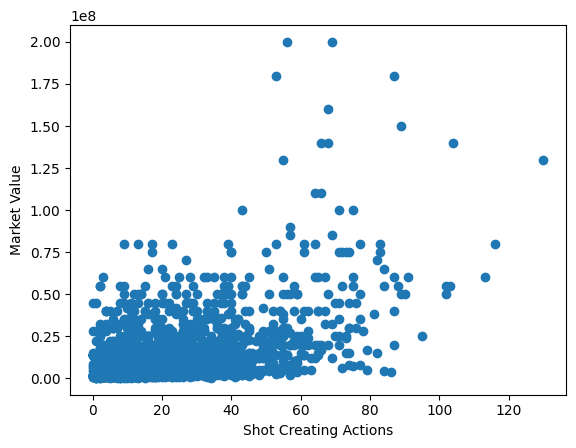

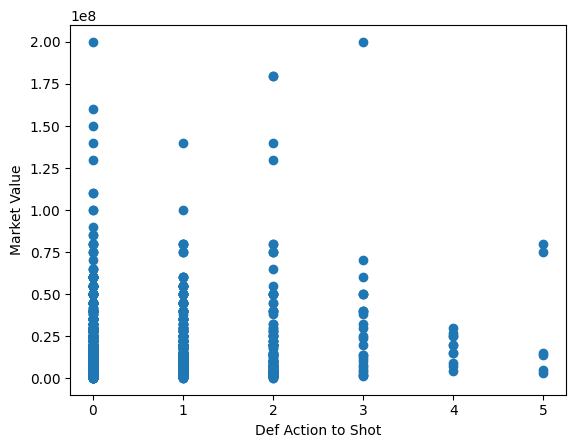

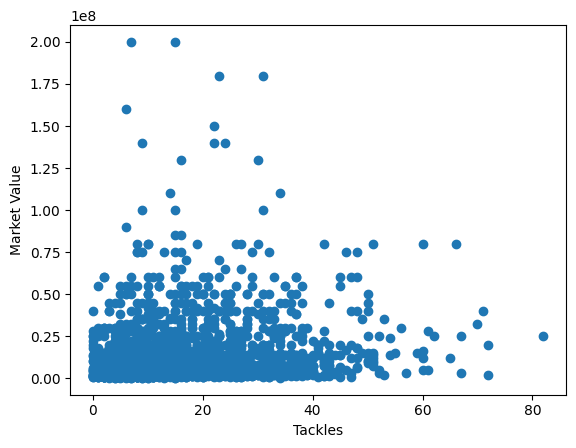

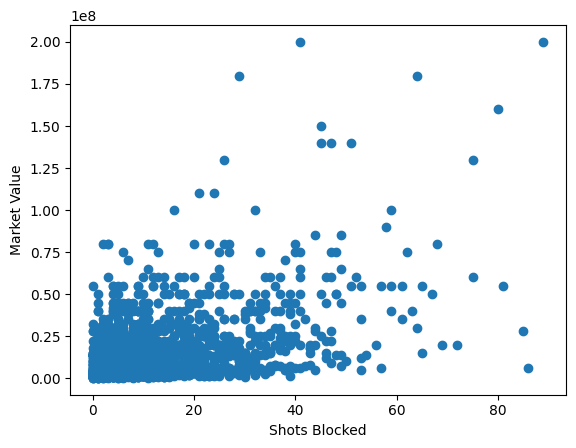

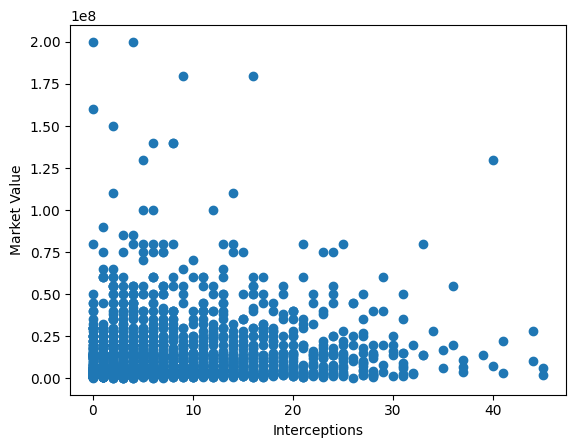

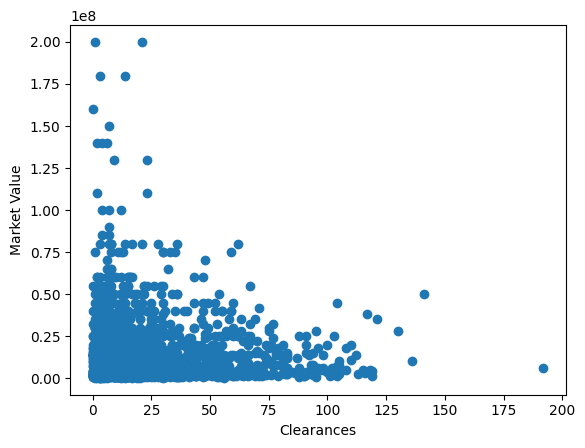

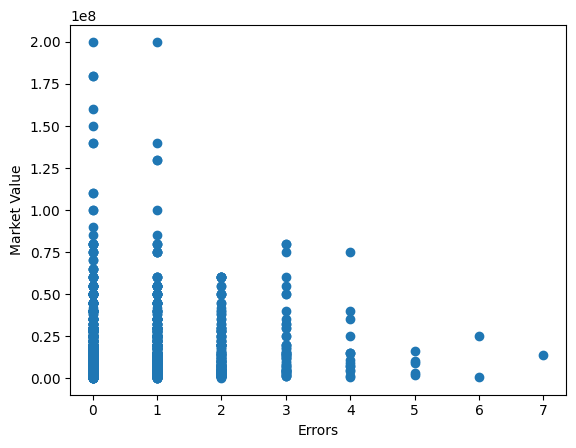

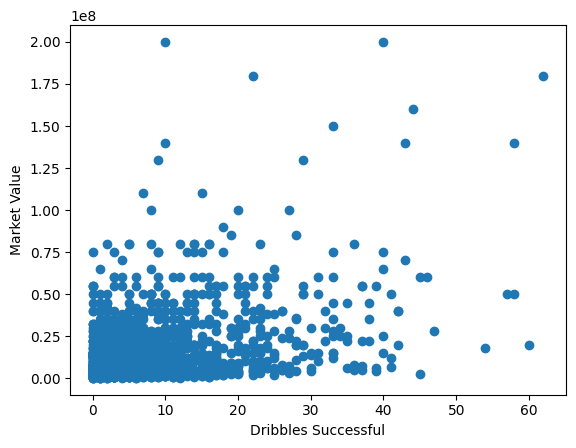

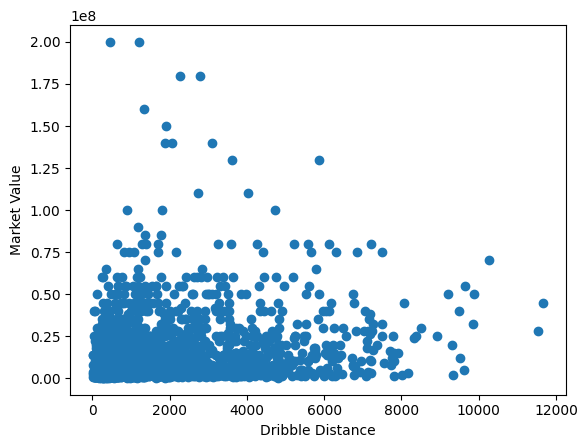

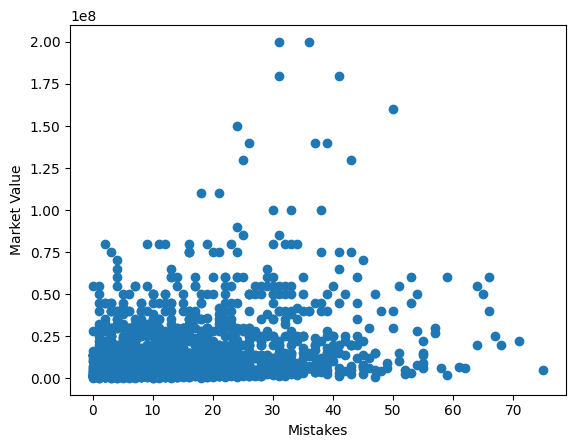

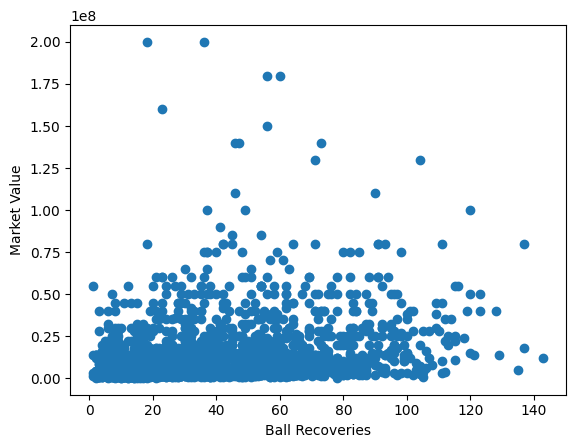

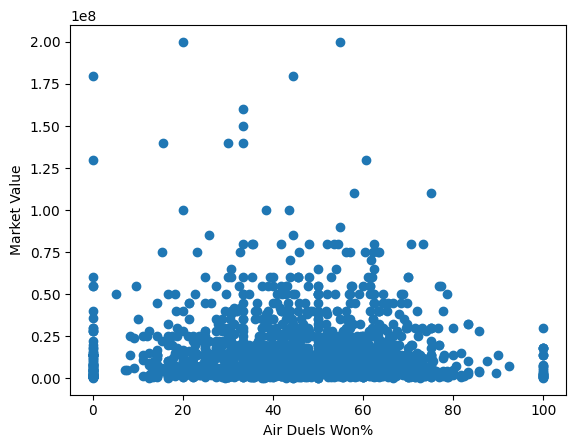

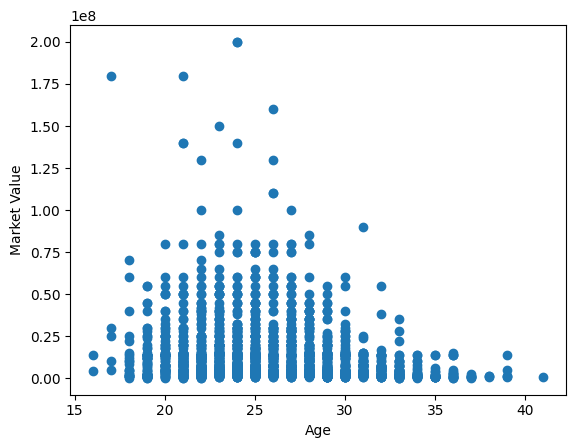

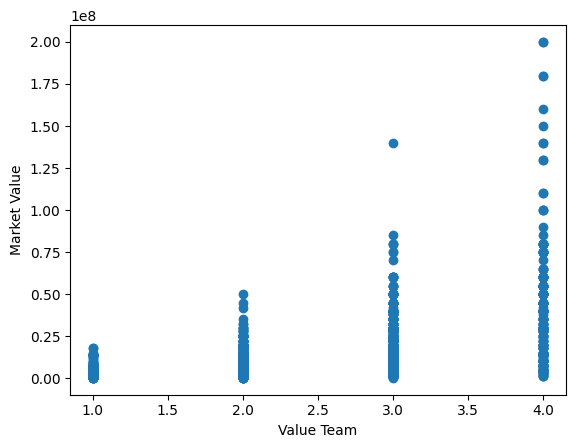

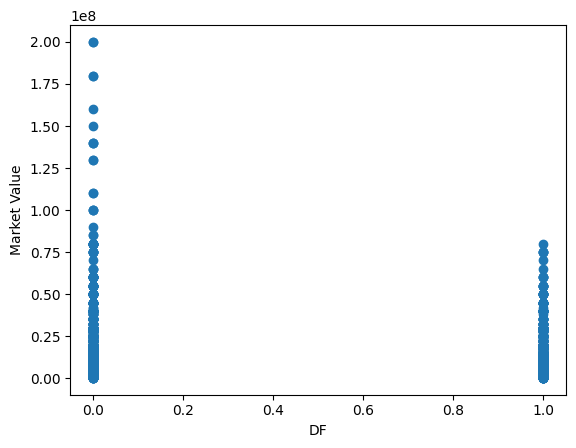

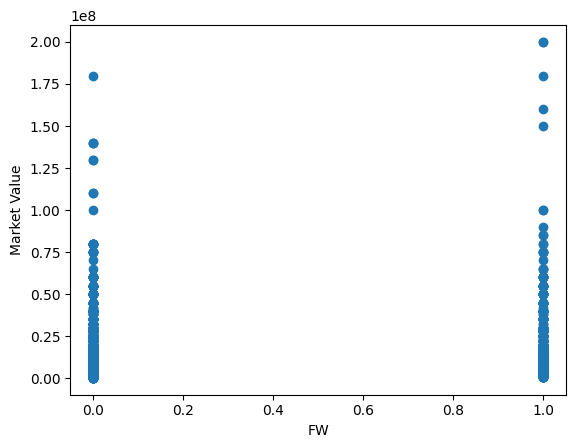

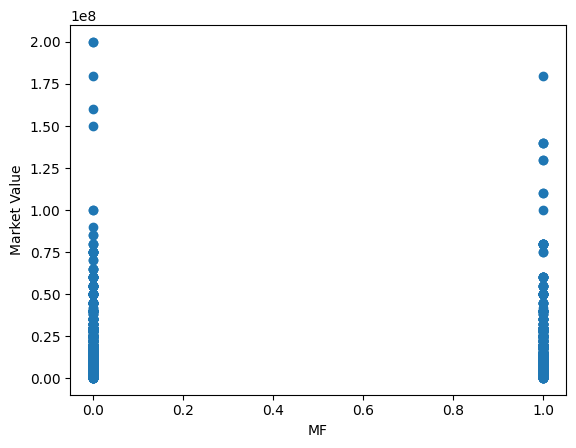

In [3074]:
# Visualize the independent variables Vs Market Value 

for col in X.columns: 
    plt.figure()
    plt.scatter(X[col], y)
    plt.ylabel('Market Value')
    plt.xlabel(col)
    
    plt.show()

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [ ]:
df1 = data.copy()
mask = data['Values'] > 0
df1['Values'] = np.where(mask, np.log(data.loc[mask, 'Values']), np.nan) 

In [3078]:
# Rename 'Values' column for clarity
df1 = df1.rename(columns={'Values': 'Log Market Value'})

In [3080]:
# One-Hot Encoding for position
df1['Is_Defender'] = (df1['DF'] > 0).astype(int)
df1['Is_Forward'] = (df1['FW'] > 0).astype(int)
df1['Is_Midfielder'] = (df1['MF'] > 0).astype(int)

In [3081]:
# Feature Engineering (calculate ratios and offensive contribution)
df1['Goals_per_MP'] = df1['Goals'] / df1['MP']
df1['Assists_per_MP'] = df1['Ast'] / df1['MP']
df1['Shot_Creating_Actions_per_MP'] = df1['Shot Creating Actions'] / df1['MP']
df1['Through_Balls_per_MP'] = df1['Through Balls'] / df1['MP']
df1['Dribbles_Successful_per_MP'] = df1['Dribbles Successful'] / df1['MP']
df1['Offensive_Index'] = df1['Goals'] + df1['Ast'] + 0.5 * df1['Shot Creating Actions']

In [ ]:
# Create a list of features
features = [
    'Min',
    'Goals',
    'Ast',
    'xA',
    'xG',
    'G+A',
    'Through Balls',
    'Dribbles Successful',
    'Ball Recoveries',
    'Age',
    'Shots Blocked',
    'Value Team',   
    'Shot Creating Actions',
    'Goals_per_MP',
    'Assists_per_MP',
    'Shot_Creating_Actions_per_MP',
    'Through_Balls_per_MP',
    'Dribbles_Successful_per_MP',
    'Offensive_Index'
    ]

In [ ]:
# Drop the columns that are not needed
columns_to_drop = [

        'Mistakes',

    'MP','SoT%', 'Dribble Distance','npxG/Sh','Crosses','Tackles','Interceptions','Dribble Distance','Air Duels Won%',
    'Pass Cmp%', 'Switch Passes', 'Def Action to Shot', 
    'Clearances', 'Errors', 'DF', 'FW', 'MF', 'Values', 'Crosses'
]

df1.drop([col for col in columns_to_drop if col in df1.columns], axis=1, errors='ignore', inplace=True)

In [3087]:
# Define X and y
X = df1[features]
y = df1['Log Market Value']

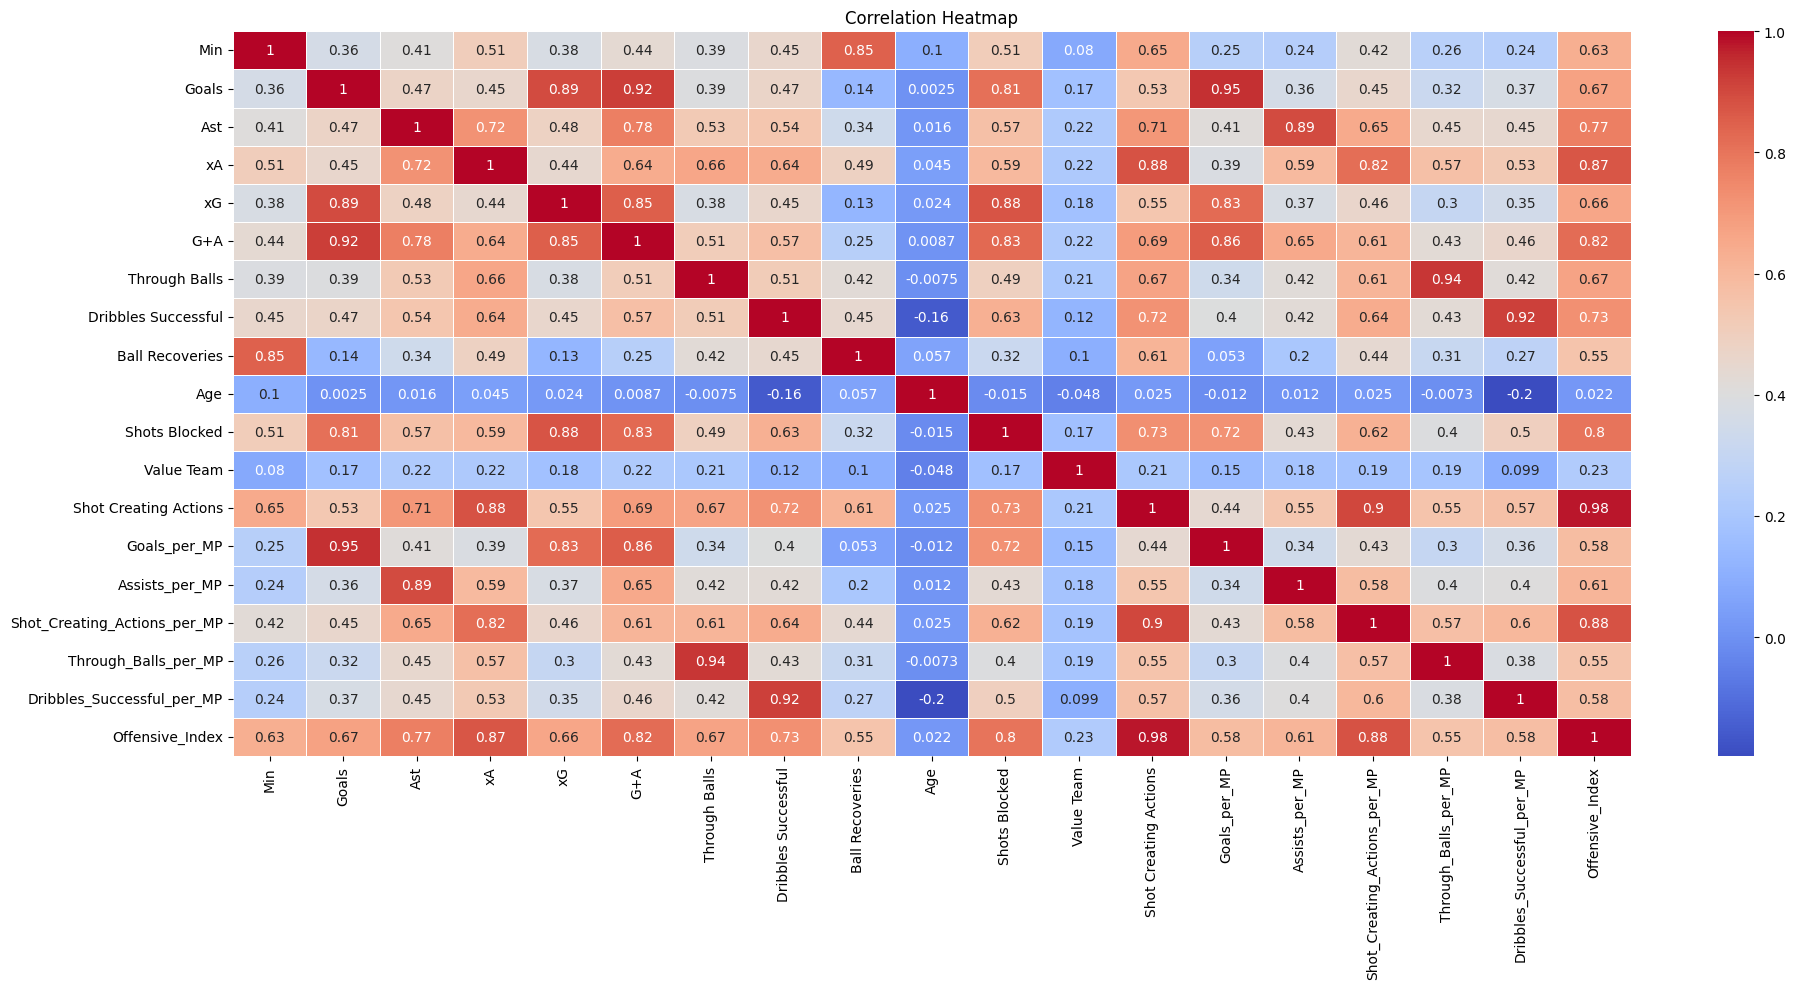

In [3088]:
# Visualize all features correlation in a heat map
plt.figure(figsize=(20, 10))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm", linewidths=.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [3089]:
# Split the data into training, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

In [3090]:
# Identify numerical and categorical features
numeric_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = ['Is_Defender', 'Is_Forward', 'Is_Midfielder']  # One-hot encode position

In [3093]:
# Identify Numerical and Categorical Features
numeric_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = ['Is_Defender', 'Is_Forward', 'Is_Midfielder']

# Keep only existing columns
numeric_features = [col for col in numeric_features if col in X.columns]
categorical_features = [col for col in categorical_features if col in X.columns]


In [ ]:
# Create Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), numeric_features) 
    ],
    remainder='passthrough'  
)

In [3096]:
# Define models
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "RandomForest": RandomForestRegressor(),
    "GradientBoosting": GradientBoostingRegressor(),
    "SVR": SVR(),
    "XGBoost": XGBRegressor(random_state=42),
    "LightGBM": LGBMRegressor(random_state=42)
}

results_df = []

In [3097]:
# Iterate through each model
for model_name, model in models.items():
    # Create a pipeline with preprocessing and the model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on the test data
    test_predictions = pipeline.predict(X_test)

    # Evaluate the model on the test data
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
    test_r2 = r2_score(y_test, test_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)

    # Prepare results for printing
    results_df.append({
        'Model Name': model_name,
        'Test RMSE': test_rmse,
        'Test R2': test_r2,
        'Test MAE': test_mae
    })

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000136 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1399
[LightGBM] [Info] Number of data points in the train set: 1193, number of used features: 19
[LightGBM] [Info] Start training from score 15.786598


In [3098]:
# Print the results
results_df = pd.DataFrame(results_df)
print("\n Test Results:")
results_df.set_index('Model Name')


 Test Results:


,Test RMSE,Test R2,Test MAE
Model Name,,,
LinearRegression,0.803517,0.578607,0.607826
Ridge,0.803449,0.578680,0.608124
Lasso,1.237830,-0.000042,1.029905
RandomForest,0.781208,0.601683,0.585019
GradientBoosting,0.735249,0.647170,0.552009
SVR,0.773375,0.609630,0.581583
XGBoost,0.792297,0.590294,0.593066
LightGBM,0.788723,0.593982,0.585557


In [3099]:
# Select the Best Performing Model (Based on Test Set MAE)
best_model_name = results_df.loc[results_df['Test MAE'].idxmin()]['Model Name']
print(f"\nBest Model (Based on Test MAE): {best_model_name}")


Best Model (Based on Test MAE): GradientBoosting


In [ ]:
param_grid = {
    'model__n_estimators': [350, 400, 450, 500],
    'model__learning_rate': [0.01, 0.012,0.02],
    'model__max_depth': [3,4],
    'model__min_samples_split': [7, 8],
    'model__min_samples_leaf': [1,2],
    'model__subsample': [0.6,0.7,0.75]
}


In [ ]:
# Create the function to train and evaluate the model
def train_and_evaluate(model, X_train, y_train, X_val, y_val, X_test, y_test, preprocessor, param_grid):

    print(f"Training and Tuning model with GridSearchCV")

    # Create the pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

    # Set up GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

    # Train the model
    grid_search.fit(X_train, y_train)

    # Get the best model and parameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Evaluate on the validation set
    val_predictions = best_model.predict(X_val)
    val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
    val_r2 = r2_score(y_val, val_predictions)
    val_mae = mean_absolute_error(y_val, val_predictions)

    # Evaluate on the test set
    test_predictions = best_model.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
    test_r2 = r2_score(y_test, test_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)

    # Store the results
    results = {
        "best_params": best_params,
        "val_rmse": val_rmse,
        "val_r2": val_r2,
        "val_mae": val_mae,
        "test_rmse": test_rmse,
        "test_r2": test_r2,
        "test_mae": test_mae
    }

    return best_model, results


In [3124]:
# Run the function with GradientBoostingRegressor
best_model, results = train_and_evaluate(GradientBoostingRegressor(random_state=42), X_train, y_train, X_val, y_val, X_test, y_test, preprocessor, param_grid)


Training and Tuning model with GridSearchCV


In [ ]:
# Print the results
print("\nModel Performance:")
print(f"Best Parameters: {results['best_params']}")
print(f"  Validation RMSE: {results['val_rmse']:.2f}")
print(f"  Validation R²: {results['val_r2']:.2f}")
print(f"  Validation MAE: {results['val_mae']:.2f}")
print(f"  Test RMSE: {results['test_rmse']:.2f}")
print(f"  Test R²: {results['test_r2']:.2f}")
print(f"  Test MAE: {results['test_mae']:.2f}")



Model Performance:
Best Parameters: {'model__learning_rate': 0.012, 'model__max_depth': 3, 'model__min_samples_leaf': 2, 'model__min_samples_split': 8, 'model__n_estimators': 400, 'model__subsample': 0.7}
  Validation RMSE: 0.75
  Validation R²: 0.61
  Validation MAE: 0.58
  Test RMSE: 0.74
  Test R²: 0.65
  Test MAE: 0.55



Feature Importance:
Feature ranking:
1. feature Value Team (0.510)
2. feature Age (0.169)
3. feature Min (0.095)
4. feature Shots Blocked (0.046)
5. feature Offensive_Index (0.032)
6. feature Shot_Creating_Actions_per_MP (0.030)
7. feature xG (0.021)
8. feature Through_Balls_per_MP (0.017)
9. feature Ball Recoveries (0.015)
10. feature Dribbles Successful (0.013)
11. feature Goals (0.010)
12. feature Shot Creating Actions (0.010)
13. feature Dribbles_Successful_per_MP (0.008)
14. feature Goals_per_MP (0.007)
15. feature G+A (0.005)
16. feature xA (0.005)
17. feature Assists_per_MP (0.003)
18. feature Through Balls (0.002)
19. feature Ast (0.001)


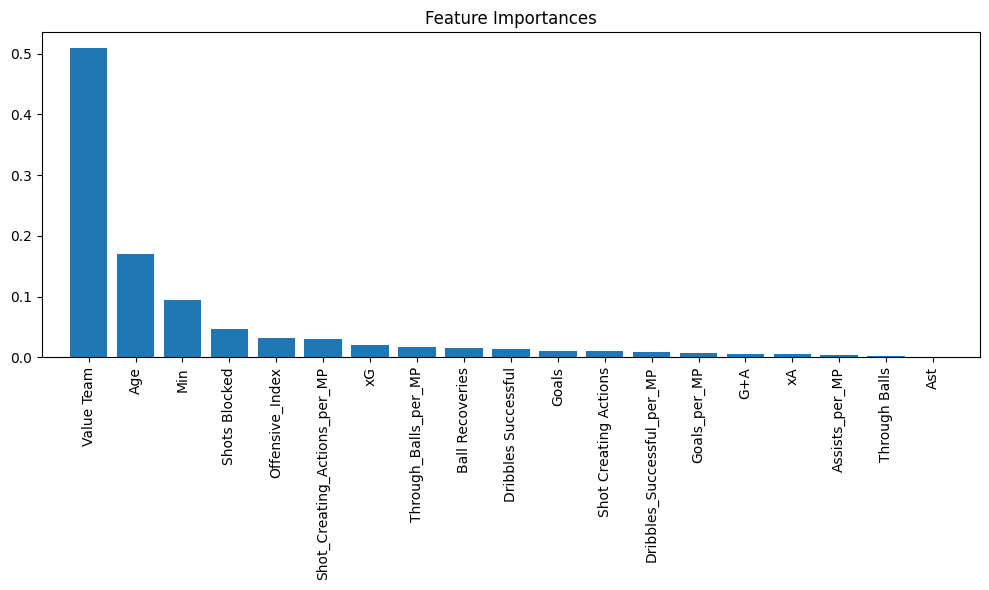

In [3126]:
# Feature Importance
print("\nFeature Importance:")
importances = best_model.named_steps['model'].feature_importances_
feature_names = X.columns.tolist()
indices = np.argsort(importances)[::-1]

# Print feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f+1}. feature {feature_names[indices[f]]} ({importances[indices[f]]:.3f})")

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

In [ ]:
# Display Predictions
print("\nPredictions on the Test Set:")
test_predictions = best_model.predict(X_test)
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': test_predictions})
predictions_df['Difference'] = predictions_df['Predicted'] - predictions_df['Actual']

predictions_df = predictions_df.join(df['Player'])
predictions_df = predictions_df[['Player', 'Actual', 'Predicted', 'Difference']]
predictions_df = predictions_df.set_index('Player')
predictions_df


Predictions on the Test Set:


,Actual,Predicted,Difference
Player,,,
Francisco Conceicao,17.399029,16.802392,-0.596638
Stefano Sensi,14.220976,14.621144,0.400169
Albert Gudmundsson,17.147715,16.525731,-0.621984
Josha Vagnoman,16.300417,15.899614,-0.400803
Conor Gallagher,17.504390,16.789733,-0.714657
...,...,...,...
Conor Coady,14.914123,14.704351,-0.209772
Keito Nakamura,16.300417,16.436532,0.136115
Mikel Merino,16.454568,17.259512,0.804944


In [3245]:
# Display Predictions
df_under = round(predictions_df.sort_values('Difference').head(10),2)
df_over = round(predictions_df.sort_values('Difference').tail(10),2)
df_over

,Actual,Predicted,Difference
Player,,,
Dani Gomez,13.82,15.36,1.54
Ali Dembele,13.59,15.17,1.58
Juan Herzog,13.82,15.41,1.59
Joaquin Correa,14.91,16.61,1.69
Theo Sainte-Luce,13.59,15.31,1.72
Justin Smith,12.61,14.66,2.05
Pau Cabanes,13.12,15.30,2.17
Nicolas Serrano,14.00,16.17,2.18
Ashley Young,13.12,15.41,2.29


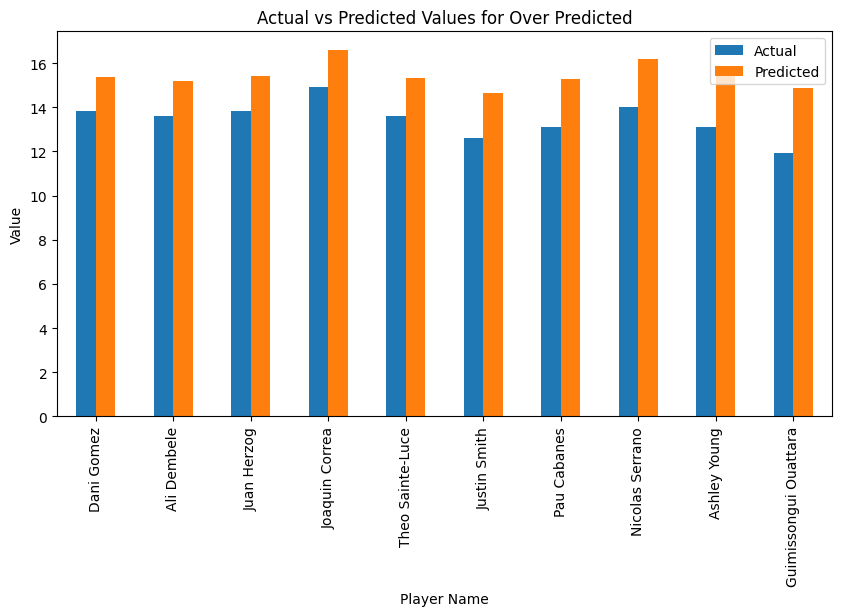

In [3250]:
#Plot the comparision of Actual and Predicted Values for Over Predicted
df_over[["Actual","Predicted"]].plot(kind='bar',figsize=(10,5))
plt.title("Actual vs Predicted Values for Over Predicted")
plt.xlabel("Player Name")
plt.ylabel('Value')
plt.show()

In [3251]:
df_under

,Actual,Predicted,Difference
Player,,,
Aridane Hernandez,16.45,13.75,-2.70
James Rodriguez,16.45,13.98,-2.47
Danilo D'Ambrosio,16.45,14.07,-2.39
Gleison Bremer,17.91,15.93,-1.98
Federico Barba,16.45,14.56,-1.90
Paulo Azzi,16.45,14.60,-1.86
Gavi,18.20,16.38,-1.82
Mario Hermoso,16.12,14.57,-1.55
Ibrahim Sangare,17.15,15.69,-1.46


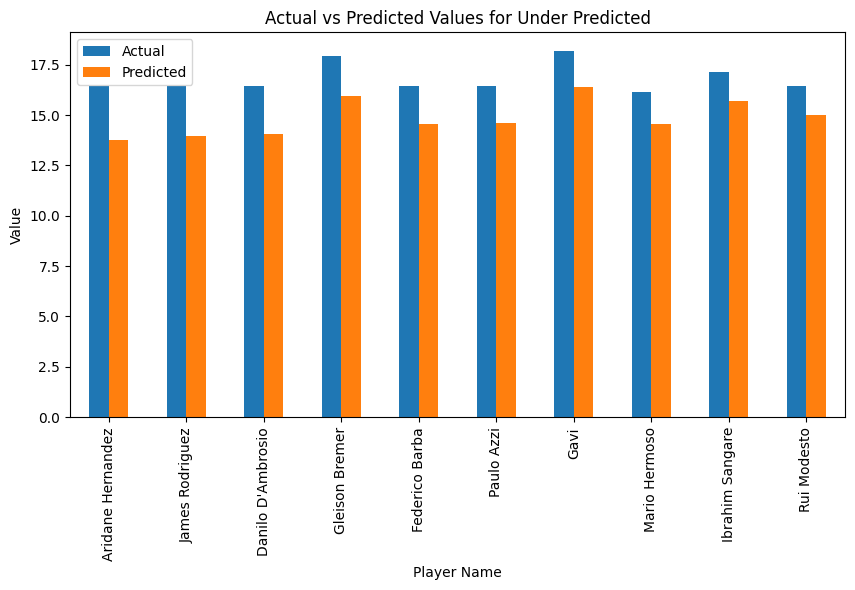

In [3254]:
#Plot the comparision of Actual and Predicted Values for Under Predicted
df_under[["Actual","Predicted"]].plot(kind='bar',figsize=(10,5))
plt.title("Actual vs Predicted Values for Under Predicted")
plt.xlabel("Player Name")
plt.ylabel('Value')
plt.show()

In [3259]:
df_min = predictions_df.iloc[abs(predictions_df['Difference']).argsort()[:10]]
df_min

,Actual,Predicted,Difference
Player,,,
Marius Wolf,14.914123,14.913900,-0.000222
Son Heung-min,17.453097,17.453437,0.000340
Leo Skiri Ostigard,15.761421,15.766173,0.004752
Thomas Meunier,14.508658,14.513550,0.004892
Alphonso Davies,17.727534,17.732877,0.005344
Bruno Fernandes,17.822844,17.829942,0.007098
Simone Verdi,14.508658,14.516373,0.007716
Zuriko Davitashvili,15.894952,15.882018,-0.012934
Jacob Bruun Larsen,15.607270,15.592880,-0.014390


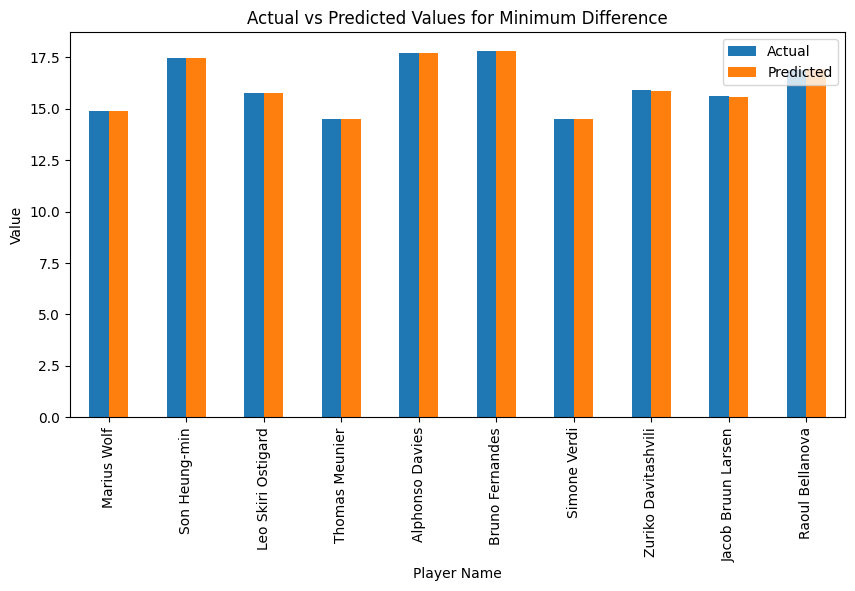

In [3260]:
# Plot the comparision of Actual and Predicted Values for Minimum Difference
df_min[["Actual","Predicted"]].plot(kind='bar',figsize=(10,5))
plt.title("Actual vs Predicted Values for Minimum Difference")
plt.xlabel("Player Name")
plt.ylabel('Value')
plt.show()

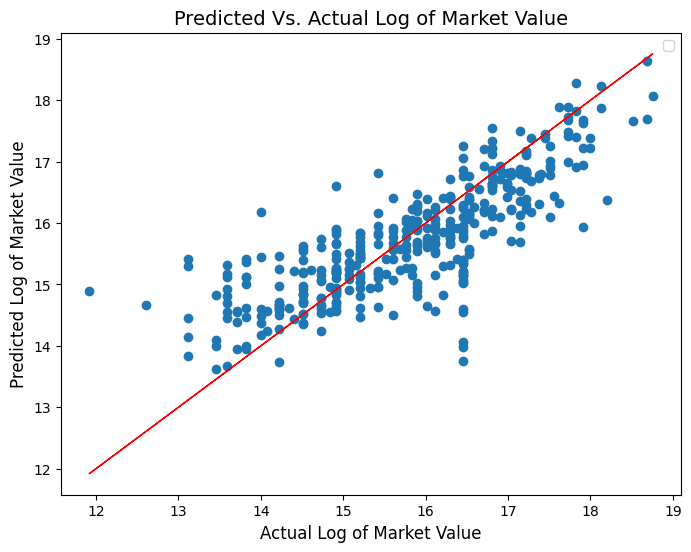

In [3267]:
# Visualize Predicted vs. log of Actual Market Value
plt.figure(figsize=(8, 6))
plt.scatter(y_test, test_predictions)
plt.plot(y_test, y_test, color='red',linewidth=1)
plt.title('Predicted Vs. Actual Log of Market Value', fontsize=14)
plt.xlabel('Actual Log of Market Value', fontsize=12)
plt.ylabel('Predicted Log of Market Value', fontsize=12)
plt.legend()
plt.show()

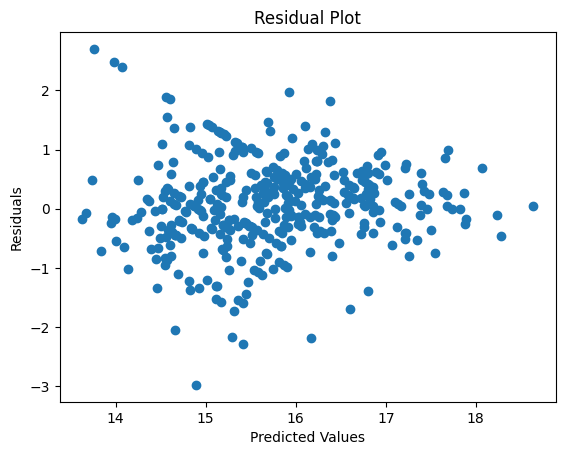

In [3268]:
# Residual Analysis
residuals = y_test - test_predictions
plt.scatter(test_predictions, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [ ]:
# Save the model
import joblib

filename = 'my_model.joblib'
joblib.dump(best_model, filename)
print(f"Mô hình đã được lưu vào file {filename}")

Mô hình đã được lưu vào file my_model.joblib
